In [1]:
#Ligar o notebook ao google drive

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
import os
import pickle as pkl
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix


In [3]:
#Lista com o nome das folds
folds = ['fold1', 'fold2', 'fold3', 'fold4', 'fold5', 'fold6', 'fold7', 'fold8', 'fold9', 'fold10']

In [4]:
#Caminho para a pasta com os arrays

features_path = "/content/drive/MyDrive/trabalho_AC2/features"

In [5]:
#Função para obter os conjuntos de treino e com todos os sons

def salience0(test_fold, train_folds):


    #Inicializar o X_test e o y_test com os dados da fold de teste
    X_test_path_1 = f"{features_path}/{test_fold}/salience1/mfccs.pkl"
    with open(X_test_path_1, 'rb') as file:
        X_test_1 = pkl.load(file)

    y_test_path_1 = f"{features_path}/{test_fold}/salience1/classes.pkl"
    with open(y_test_path_1, 'rb') as file:
        y_test_1 = pkl.load(file)

    X_test_path_2 = f"{features_path}/{test_fold}/salience2/mfccs.pkl"
    with open(X_test_path_2, 'rb') as file:
        X_test_2 = pkl.load(file)

    y_test_path_2 = f"{features_path}/{test_fold}/salience2/classes.pkl"
    with open(y_test_path_2, 'rb') as file:
        y_test_2 = pkl.load(file)

    X_test = np.concatenate((X_test_1, X_test_2), axis=0)
    y_test = np.concatenate((y_test_1, y_test_2), axis=0)


    #Inicializar o X_train e o y_train com os dados da primeira fold de treino
    X_train_path_1 = f"{features_path}/{train_folds[0]}/salience1/mfccs.pkl"
    with open(X_train_path_1, 'rb') as file:
        X_train = pkl.load(file)

    y_train_path_1 = f"{features_path}/{train_folds[0]}/salience1/classes.pkl"
    with open(y_train_path_1, 'rb') as file:
        y_train = pkl.load(file)

    X_train_path_2 = f"{features_path}/{train_folds[0]}/salience2/mfccs.pkl"
    with open(X_train_path_2, 'rb') as file:
        X_train_2 = pkl.load(file)

    y_train_path_2 = f"{features_path}/{train_folds[0]}/salience2/classes.pkl"
    with open(y_train_path_2, 'rb') as file:
        y_train_2 = pkl.load(file)

    X_train = np.concatenate((X_train, X_train_2), axis=0)
    y_train = np.concatenate((y_train, y_train_2), axis=0)


    #Acrescentar os dados das restantes folds de treino
    for train_fold in train_folds[1:]:

        X_train_path_1 = f"{features_path}/{train_fold}/salience1/mfccs.pkl"
        with open(X_train_path_1, 'rb') as file:
            X_train_1 = pkl.load(file)

        X_train = np.concatenate((X_train, X_train_1), axis=0)

        X_train_path_2 = f"{features_path}/{train_fold}/salience2/mfccs.pkl"
        with open(X_train_path_2, 'rb') as file:
            X_train_2 = pkl.load(file)

        X_train = np.concatenate((X_train, X_train_2), axis=0)

        y_train_path_1 = f"{features_path}/{train_fold}/salience1/classes.pkl"
        with open(y_train_path_1, 'rb') as file:
            y_train_1 = pkl.load(file)

        y_train = np.concatenate((y_train, y_train_1), axis=0)

        y_train_path_2 = f"{features_path}/{train_fold}/salience2/classes.pkl"
        with open(y_train_path_2, 'rb') as file:
            y_train_2 = pkl.load(file)

        y_train = np.concatenate((y_train, y_train_2), axis=0)

    return X_train, y_train, X_test, y_test


In [6]:
#Função para obter os conjuntos de treino e com os sons com salience 1 (Foreground)

def salience1(test_fold, train_folds):


    #Inicializar o X_test e o y_test com os dados da fold de teste
    X_test_path = f"{features_path}/{test_fold}/salience1/mfccs.pkl"
    with open(X_test_path, 'rb') as file:
        X_test = pkl.load(file)

    y_test_path = f"{features_path}/{test_fold}/salience1/classes.pkl"
    with open(y_test_path, 'rb') as file:
        y_test = pkl.load(file)


    #Inicializar o X_train e o y_train com os dados da primeira fold de treino
    X_train_path_1 = f"{features_path}/{train_folds[0]}/salience1/mfccs.pkl"
    with open(X_train_path_1, 'rb') as file:
        X_train = pkl.load(file)

    y_train_path_1 = f"{features_path}/{train_folds[0]}/salience1/classes.pkl"
    with open(y_train_path_1, 'rb') as file:
        y_train = pkl.load(file)



    #Acrescentar os dados das restantes folds de treino
    for train_fold in train_folds[1:]:

        X_train_path_1 = f"{features_path}/{train_fold}/salience1/mfccs.pkl"
        with open(X_train_path_1, 'rb') as file:
            X_train_1 = pkl.load(file)

        X_train = np.concatenate((X_train, X_train_1), axis=0)


        y_train_path_1 = f"{features_path}/{train_fold}/salience1/classes.pkl"
        with open(y_train_path_1, 'rb') as file:
            y_train_1 = pkl.load(file)

        y_train = np.concatenate((y_train, y_train_1), axis=0)

    return X_train, y_train, X_test, y_test


In [7]:
#Função para obter os conjuntos de treino e com os sons com salience 2 (Background)

def salience2(test_fold, train_folds):


    #Inicializar o X_test e o y_test com os dados da fold de teste
    X_test_path = f"{features_path}/{test_fold}/salience2/mfccs.pkl"
    with open(X_test_path, 'rb') as file:
        X_test = pkl.load(file)

    y_test_path = f"{features_path}/{test_fold}/salience2/classes.pkl"
    with open(y_test_path, 'rb') as file:
        y_test = pkl.load(file)





    #Inicializar o X_train e o y_train com os dados da primeira fold de treino
    X_train_path_2 = f"{features_path}/{train_folds[0]}/salience2/mfccs.pkl"
    with open(X_train_path_2, 'rb') as file:
        X_train = pkl.load(file)

    y_train_path_2 = f"{features_path}/{train_folds[0]}/salience2/classes.pkl"
    with open(y_train_path_2, 'rb') as file:
        y_train = pkl.load(file)



    #Acrescentar os dados das restantes folds de treino
    for train_fold in train_folds[1:]:

        X_train_path_2 = f"{features_path}/{train_fold}/salience2/mfccs.pkl"
        with open(X_train_path_2, 'rb') as file:
            X_train_2 = pkl.load(file)

        X_train = np.concatenate((X_train, X_train_2), axis=0)


        y_train_path_2 = f"{features_path}/{train_fold}/salience2/classes.pkl"
        with open(y_train_path_2, 'rb') as file:
            y_train_2 = pkl.load(file)

        y_train = np.concatenate((y_train, y_train_2), axis=0)

    return X_train, y_train, X_test, y_test


In [8]:
#Função para obter os dados de treino e teste dada a fold de teste e a salience

def get_train_and_test_data(fold, salience):
    test_fold = fold
    train_folds = [item for item in folds if item != test_fold]

    if salience == 0:
        X_train, y_train, X_test, y_test = salience0(test_fold, train_folds)

    elif salience == 1:
        X_train, y_train, X_test, y_test = salience1(test_fold, train_folds)

    elif salience == 2:
        X_train, y_train, X_test, y_test = salience2(test_fold, train_folds)

    return X_train, y_train, X_test, y_test






In [ ]:
#Exemplo do shape dos dados com salience 0

X_train, y_train, X_test, y_test = get_train_and_test_data('fold1', 0)
print(f"X_train -> {X_train.shape}")
print(f"y_train -> {y_train.shape}")
print(f"X_test -> {X_test.shape}")
print(f"y_test -> {y_test.shape}")


X_train -> (7859, 40, 321)
y_train -> (7859,)
X_test -> (873, 40, 321)
y_test -> (873,)


In [ ]:
#Exemplo do shape dos dados com salience 1

X_train, y_train, X_test, y_test = get_train_and_test_data('fold1', 1)
print(f"X_train -> {X_train.shape}")
print(f"y_train -> {y_train.shape}")
print(f"X_test -> {X_test.shape}")
print(f"y_test -> {y_test.shape}")


X_train -> (5080, 40, 321)
y_train -> (5080,)
X_test -> (622, 40, 321)
y_test -> (622,)


In [ ]:
#Exemplo do shape dos dados com salience 2

X_train, y_train, X_test, y_test = get_train_and_test_data('fold1', 2)
print(f"X_train -> {X_train.shape}")
print(f"y_train -> {y_train.shape}")
print(f"X_test -> {X_test.shape}")
print(f"y_test -> {y_test.shape}")


X_train -> (2779, 40, 321)
y_train -> (2779,)
X_test -> (251, 40, 321)
y_test -> (251,)


In [9]:
"""
Função para desenhar uma matriz confusão numa determinada posição dentro de uma figura

Argumentos:
            cm -> matriz confusão
            class_names -> lista com o nome das classes
            ax -> posição na figura
            title -> titulo para o plot
"""

def plot_confusion_matrix(cm, class_names, ax, title):

    sns.heatmap(
        cm,
        annot=True,
        square=True,
        xticklabels=class_names,
        yticklabels=class_names,
        fmt='d',
        cmap=plt.cm.Blues,
        cbar=False,
        ax=ax)
    ax.set_title(title, fontsize = 12)
    ax.set_xticklabels(ax.get_xticklabels(), rotation = 45, ha = "right")
    ax.set_ylabel('True Label', fontsize= 10)
    ax.set_xlabel('Predicted Label', fontsize = 10)


In [10]:
"""
Função para desenhar um gráfico com a evolução da accuracy e da loss do treino de um modelo

Argumento:
          history -> história retornada pelo método fit do tensorflow
"""

def plot_history(history):

    # Plot the results
    acc = history.history['sparse_categorical_accuracy']
    val_acc = history.history['val_sparse_categorical_accuracy']
    loss = history.history['loss']
    val_loss = history.history['val_loss']

    epochs = range(len(acc))

    plt.plot(epochs, acc, 'r', label='Training accuracy')
    plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
    plt.title('Training and validation accuracy')
    plt.legend(loc=0)
    plt.figure()

    plt.plot(epochs, loss, 'r', label='Training loss')
    plt.plot(epochs, val_loss, 'b', label='Validation loss')
    plt.title('Training and validation loss')
    plt.legend(loc=0)
    plt.figure()


    plt.show()

## 2D CNN

In [11]:
import tensorflow as tf
from tensorflow.keras.models import Sequential, save_model, load_model
from tensorflow.keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D, BatchNormalization

In [ ]:
#Método para parar o treino prematuramnete caso não haja melhorias na accuracy de teste

early = tf.keras.callbacks.EarlyStopping(monitor = 'val_sparse_categorical_accuracy',patience = 10, min_delta = 0.001, restore_best_weights = True)

In [ ]:
#Modelo CNN

def get_cnn_model():
    model = Sequential([

                        Conv2D(filters=32, kernel_size=(3,3), padding='same', activation='relu', input_shape=(40, 321, 1)),

                        MaxPooling2D(pool_size=(2,2)),

                        BatchNormalization(),

                        Conv2D(filters=32, kernel_size=(3,3), padding='same', activation='relu'),

                        MaxPooling2D(pool_size=(2,2)),

                        Dropout(0.15),

                        Conv2D(filters=64, kernel_size=(3,3), padding='same', activation='relu'),

                        MaxPooling2D(pool_size=(2,2)),

                        Dropout(0.15),

                        Flatten(),

                        Dense(256, activation='relu'),

                        Dense(10, activation='softmax')
    ])



    model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['sparse_categorical_accuracy'])

    return model

In [ ]:
cnn_model = get_cnn_model()
cnn_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 40, 321, 32)       320       
                                                                 
 max_pooling2d (MaxPooling2  (None, 20, 160, 32)       0         
 D)                                                              
                                                                 
 batch_normalization (Batch  (None, 20, 160, 32)       128       
 Normalization)                                                  
                                                                 
 conv2d_1 (Conv2D)           (None, 20, 160, 32)       9248      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 10, 80, 32)        0         
 g2D)                                                            
                                                        

In [ ]:
"""
Treinar o modelo com cross validation para cada salience
Guarda a história e a accuracy de cada treino numa lista para serem analisadas postriornente
Guarda também os modelos treinados
"""

epochs = 50

fold_cnn_history  = []
fold_cnn_accuracy = []

for fold in folds:
    print()
    print(f"Test fold -> {fold}")
    for salience in [0, 1, 2]:
        print(f"Salience -> {salience}")
        model_path = f"/content/drive/MyDrive/trabalho_AC2/models/cnn/{fold}/salience{salience}"
        X_train, y_train, X_test, y_test = get_train_and_test_data(fold, salience)
        cnn_model = get_cnn_model()
        history = cnn_model.fit(X_train, y_train, batch_size=64, epochs=epochs, validation_data=(X_test, y_test), callbacks=[early], verbose=0)
        accuracy_score = cnn_model.evaluate(X_test, y_test)
        fold_cnn_history.append(history)
        fold_cnn_accuracy.append(accuracy_score)
        save_model(cnn_model, model_path)





Test fold -> fold1
Salience -> 0
28/28 [==============================] - 0s 5ms/step - loss: 2.4486 - sparse_categorical_accuracy: 0.6357
Salience -> 1
20/20 [==============================] - 0s 8ms/step - loss: 2.3174 - sparse_categorical_accuracy: 0.7379
Salience -> 2
8/8 [==============================] - 0s 4ms/step - loss: 5.1901 - sparse_categorical_accuracy: 0.5060

Test fold -> fold2
Salience -> 0
28/28 [==============================] - 0s 5ms/step - loss: 2.3422 - sparse_categorical_accuracy: 0.6419
Salience -> 1
18/18 [==============================] - 0s 4ms/step - loss: 1.2920 - sparse_categorical_accuracy: 0.7796
Salience -> 2
11/11 [==============================] - 0s 6ms/step - loss: 2.3814 - sparse_categorical_accuracy: 0.4333

Test fold -> fold3
Salience -> 0
29/29 [==============================] - 0s 4ms/step - loss: 3.2240 - sparse_categorical_accuracy: 0.5438
Salience -> 1
19/19 [==============================] - 0s 4ms/step - loss: 1.4750 - sparse_categorical

In [ ]:
"""
Dataframe com os resultados de todas as iterações
Cada linha é uma iteração e as folds foram usadas para teste por ordem, ou seja, a primeira linha corresponde
ao teste feito com a fold 1 servindo como teste e assim por diante
"""

CNN_df = pd.DataFrame(np.array(fold_cnn_accuracy)[:,1].reshape(10,3)*100,  columns=['2D-CNN', '2D-CNN_FG', '2D-CNN_BG'])
CNN_df

,2D-CNN,2D-CNN_FG,2D-CNN_BG
0,63.573885,73.794210,50.597608
1,64.189190,77.956986,43.333334
2,54.378378,60.508472,51.044774
3,63.737375,67.741936,54.861110
4,74.252135,77.677226,61.172163
5,62.940460,74.174756,54.220778
6,69.928402,81.558937,58.333331
7,67.617863,75.543481,54.724407
8,68.014705,83.818179,41.353384
9,71.087217,85.387325,48.698884


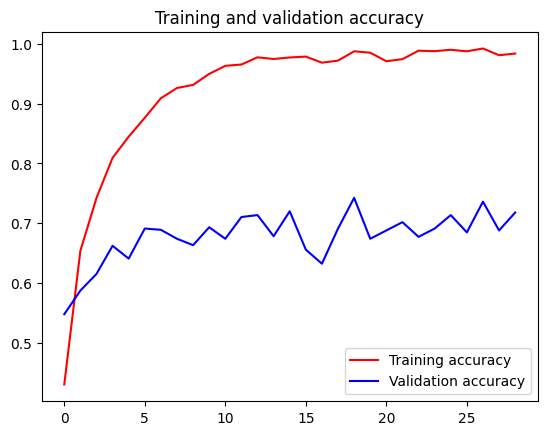

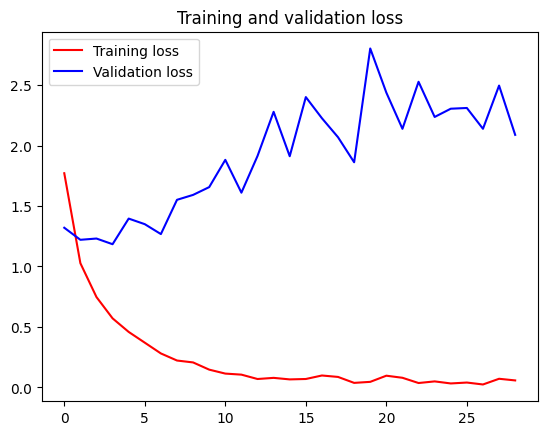

<Figure size 640x480 with 0 Axes>

In [ ]:
#Gráficos do melhor treino com a salience 0

best_history_cnn = fold_cnn_history[12]
plot_history(best_history_cnn)

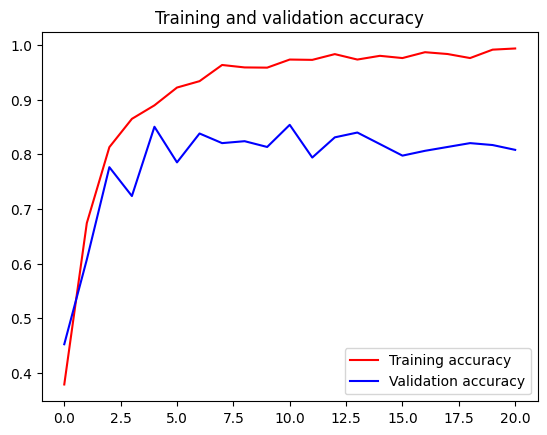

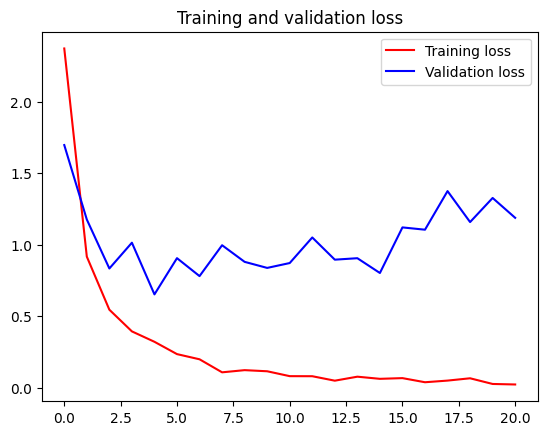

<Figure size 640x480 with 0 Axes>

In [ ]:
#Gráficos do melhor treino com a salience 1

best_history_cnn_fg = fold_cnn_history[28]
plot_history(best_history_cnn_fg)


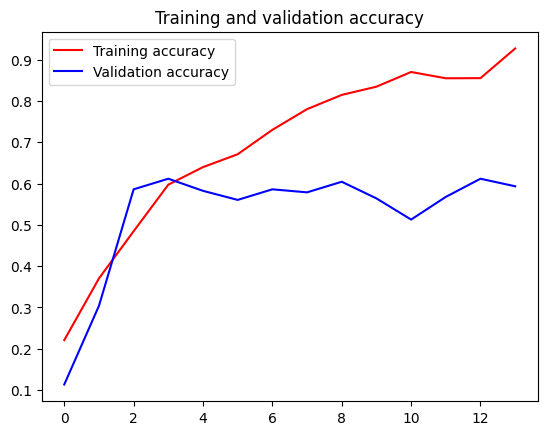

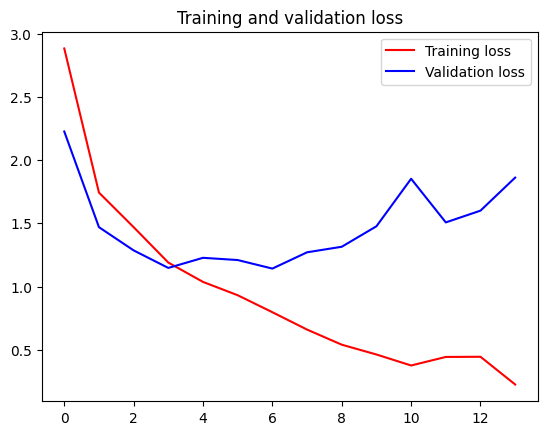

<Figure size 640x480 with 0 Axes>

In [ ]:
#Gráficos do melhor treino com a salience 2

best_history_cnn_fg = fold_cnn_history[14]
plot_history(best_history_cnn_fg)


In [ ]:
#Guardar o dataframe para um ficheiro csv

CNN_df.to_csv('/content/drive/MyDrive/trabalho_AC2/CNN_results.csv', index=False)

In [12]:
CNN_df = pd.read_csv('/content/drive/MyDrive/trabalho_AC2/CNN_results.csv')

8/8 [==============================] - 1s 132ms/step


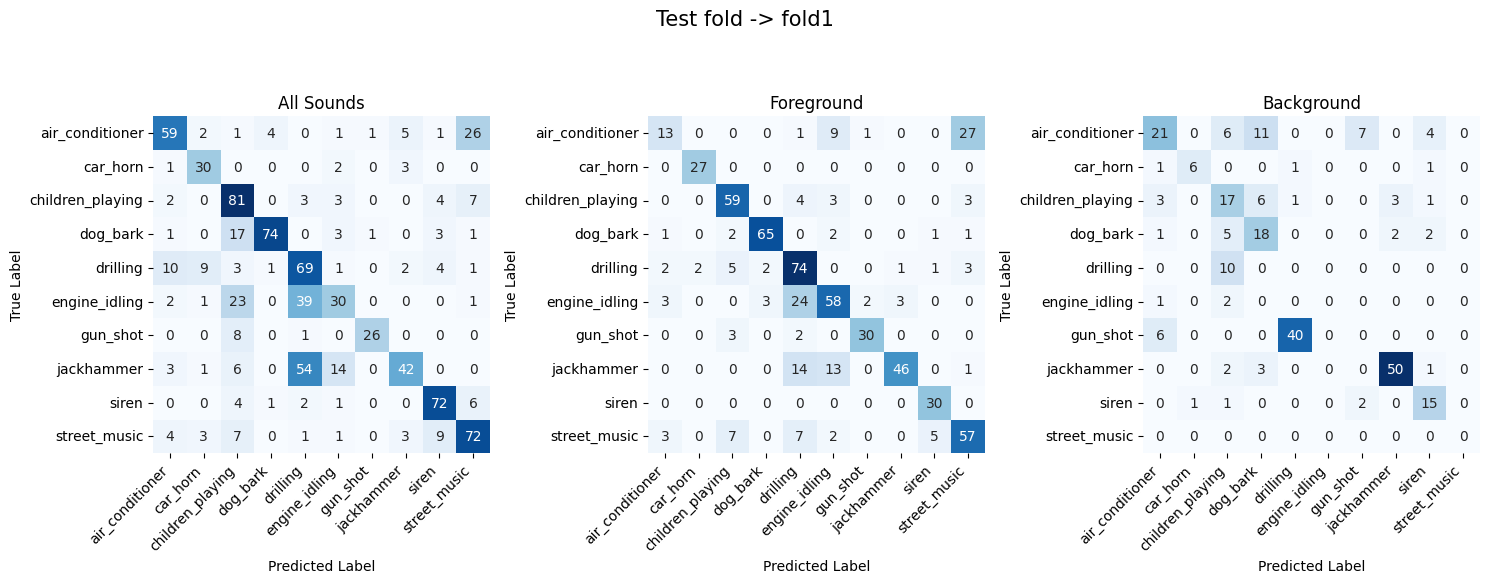

11/11 [==============================] - 2s 127ms/step


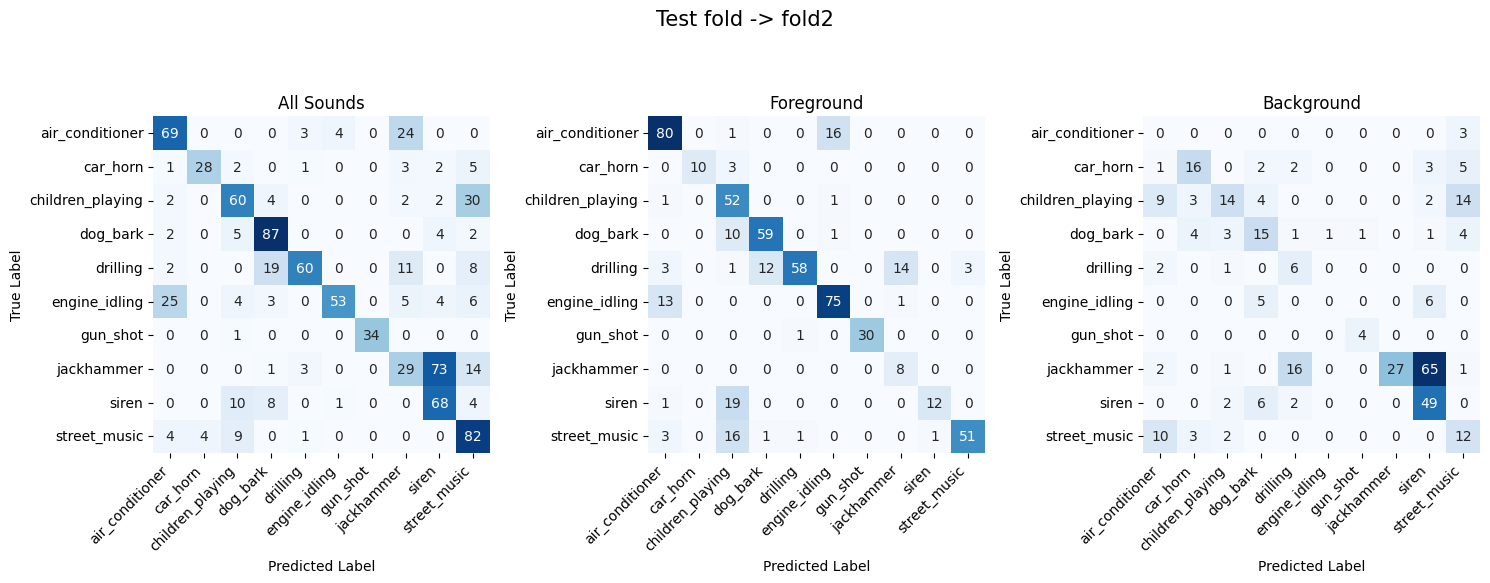

11/11 [==============================] - 2s 130ms/step


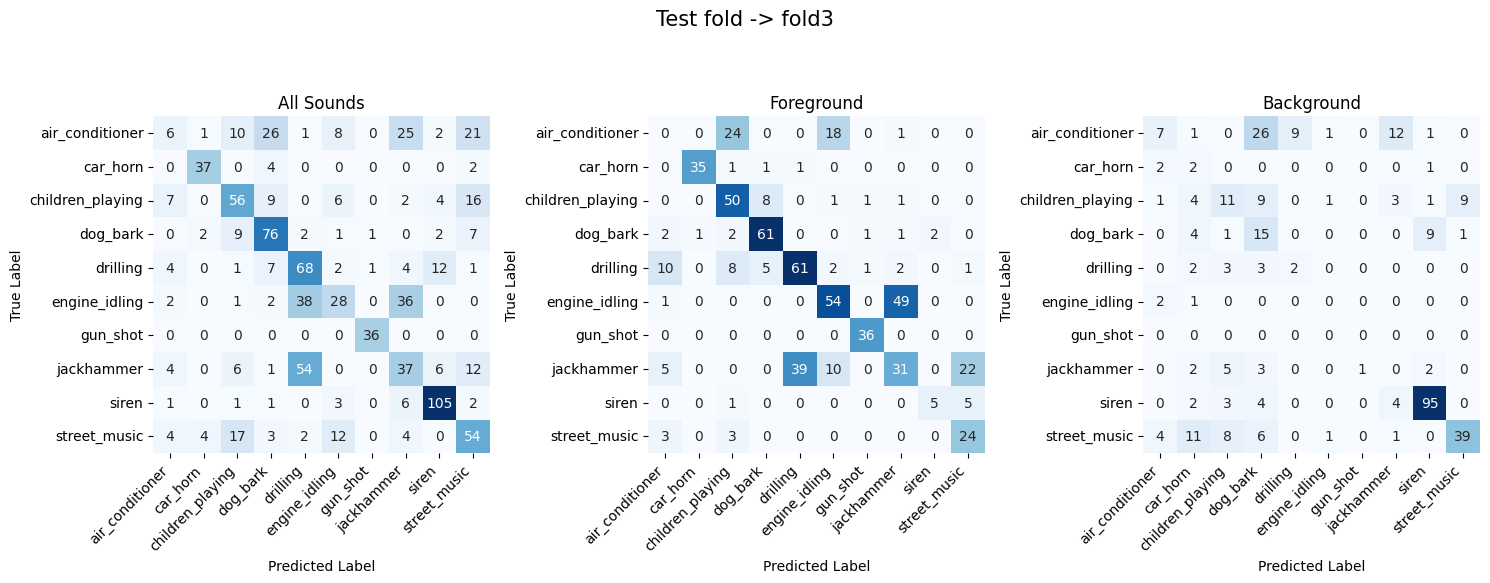

14/14 [==============================] - 2s 137ms/step


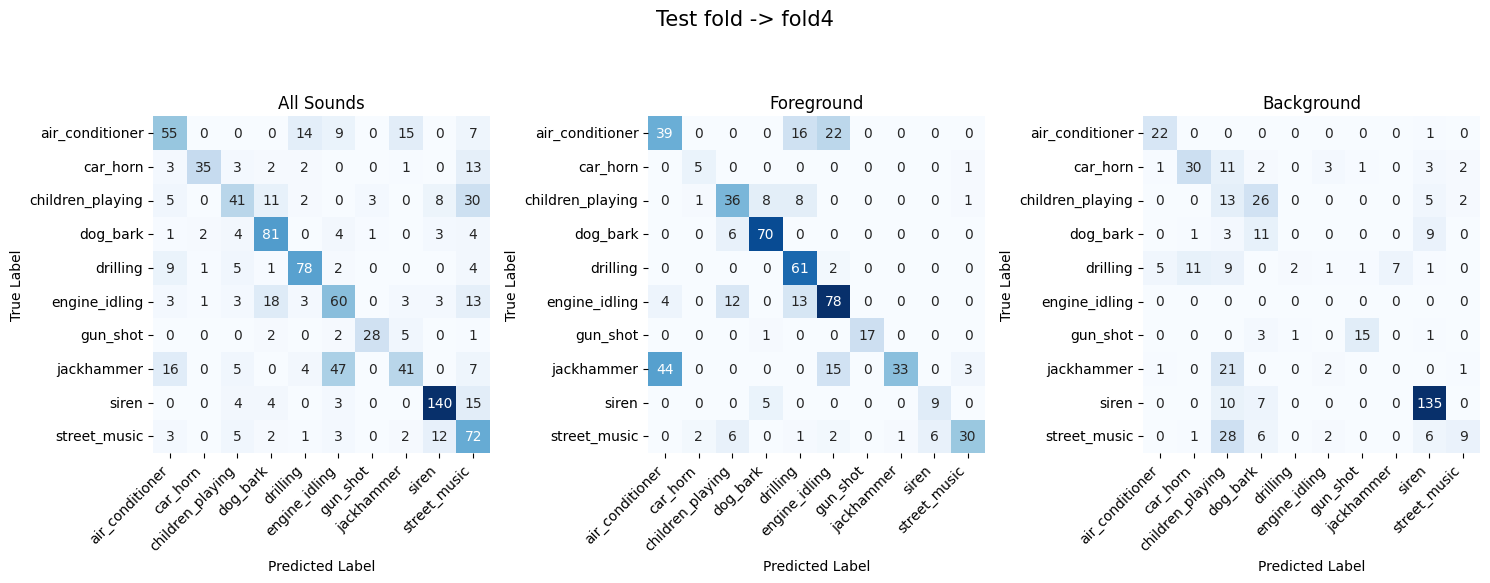

9/9 [==============================] - 1s 123ms/step


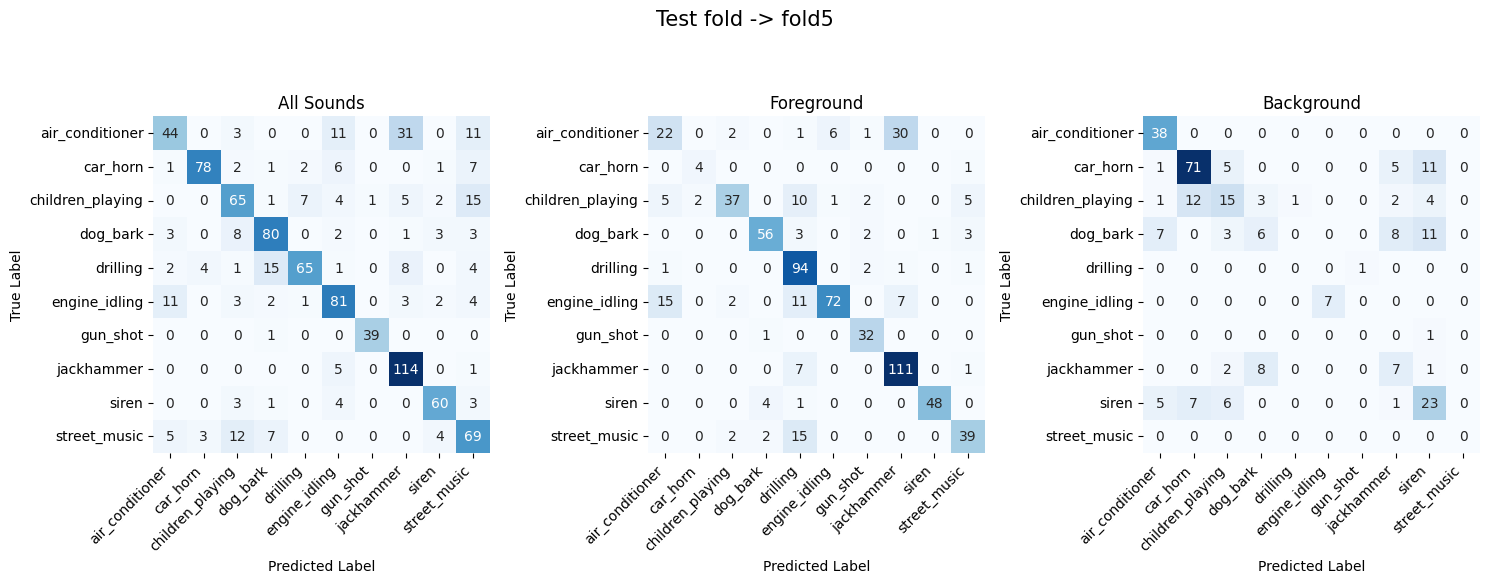

10/10 [==============================] - 1s 134ms/step


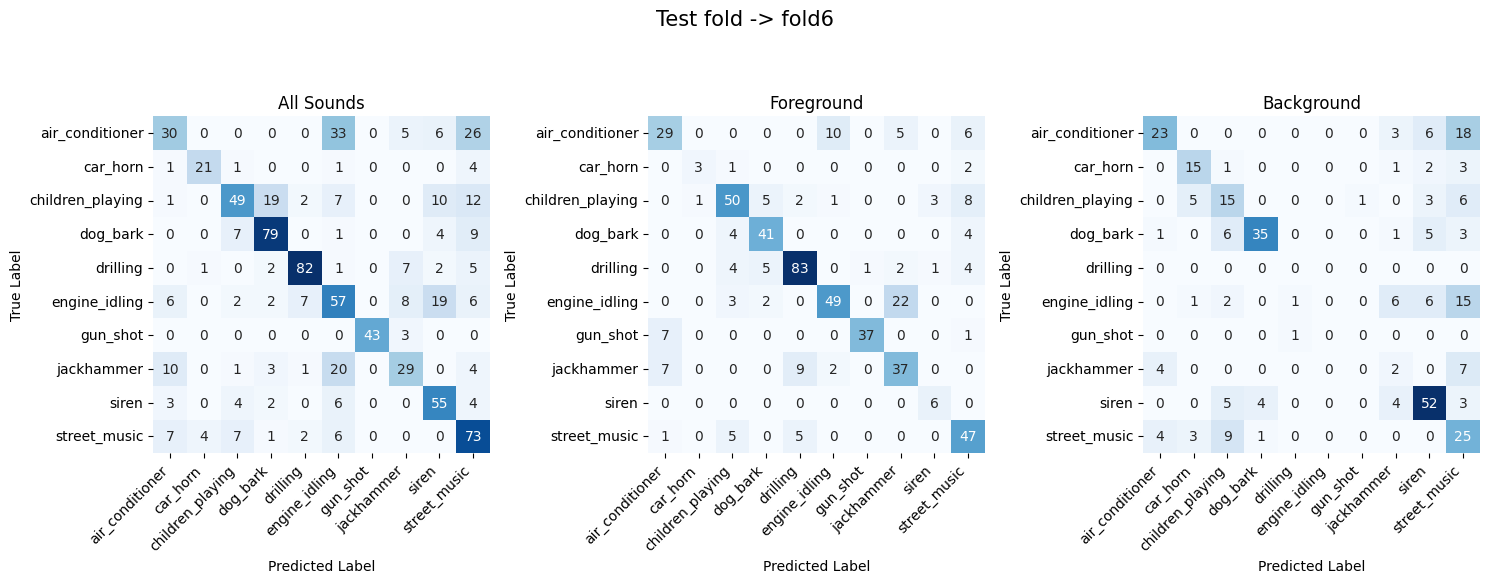

10/10 [==============================] - 1s 139ms/step


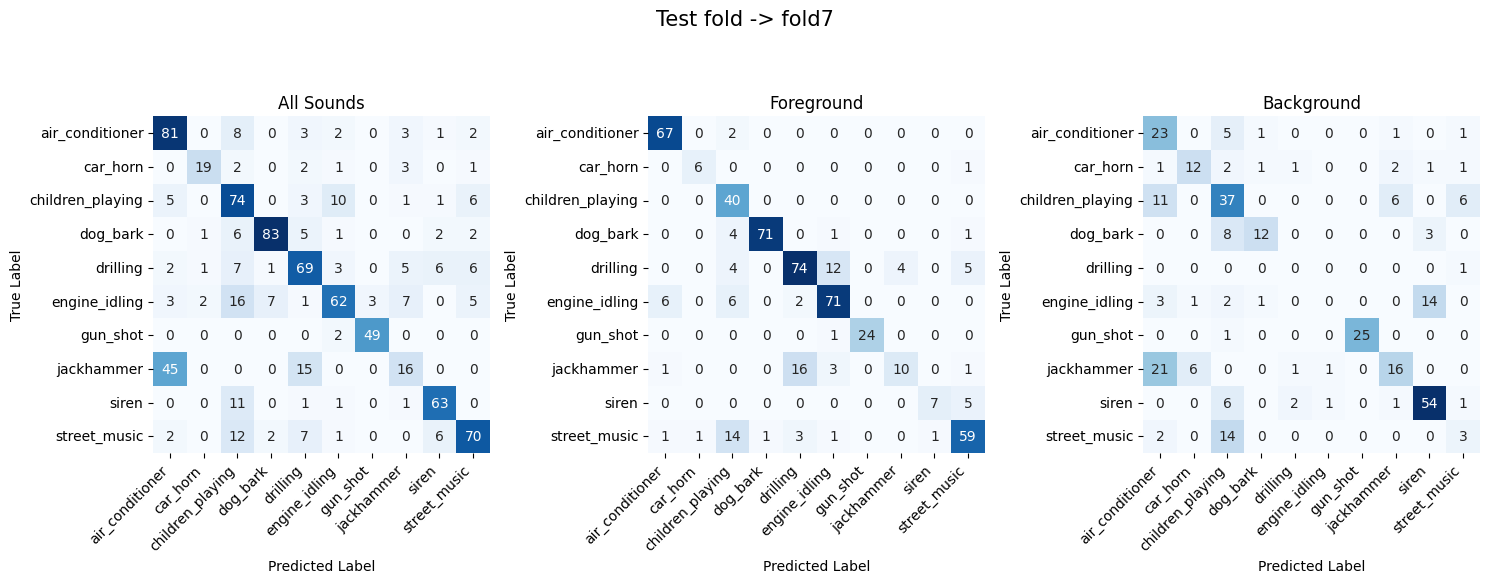

8/8 [==============================] - 2s 221ms/step


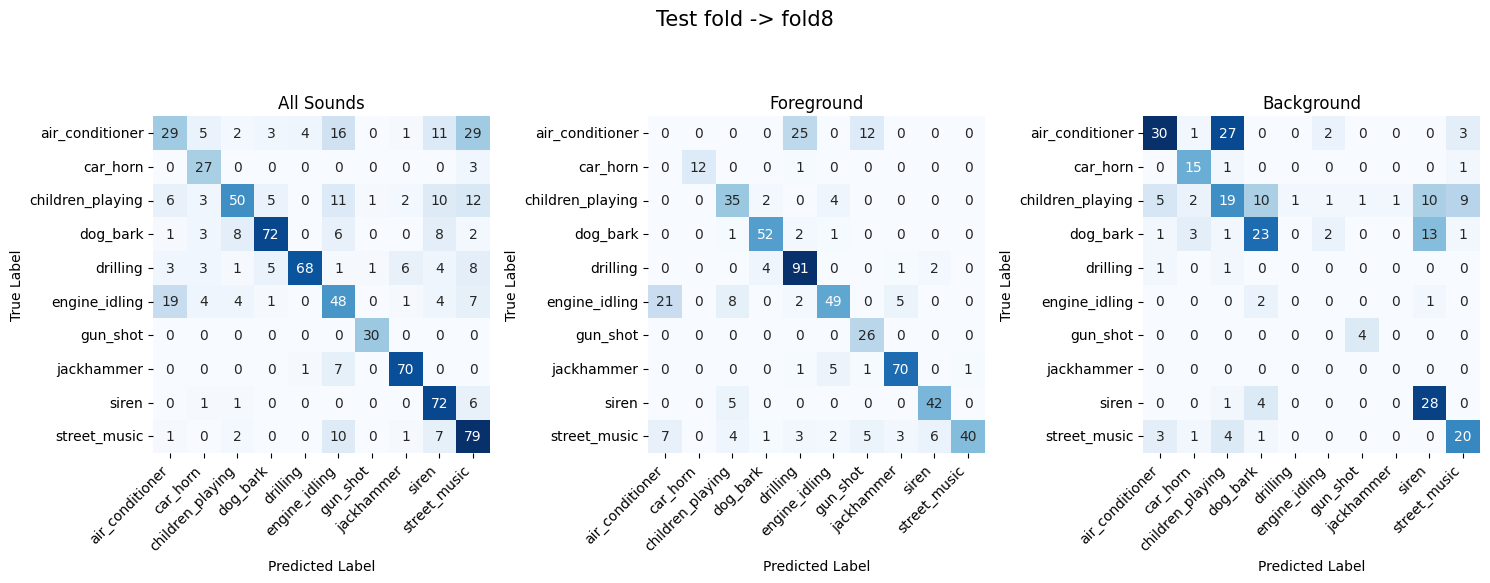

9/9 [==============================] - 1s 133ms/step


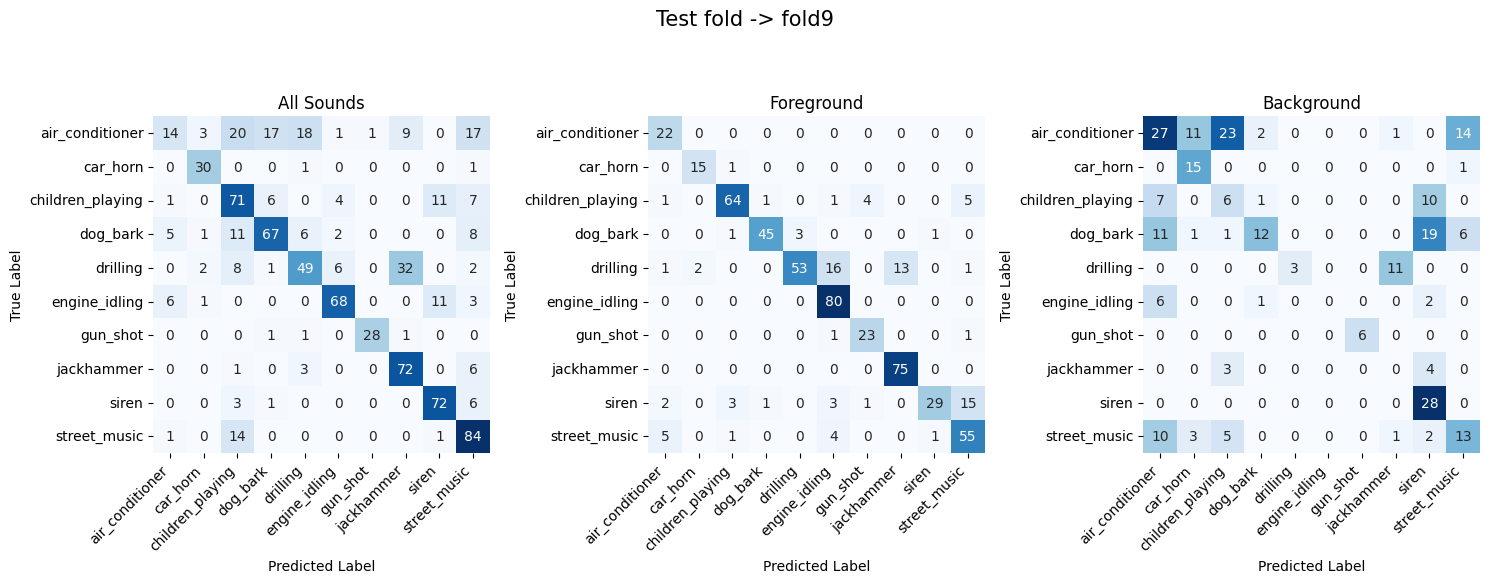

9/9 [==============================] - 1s 150ms/step


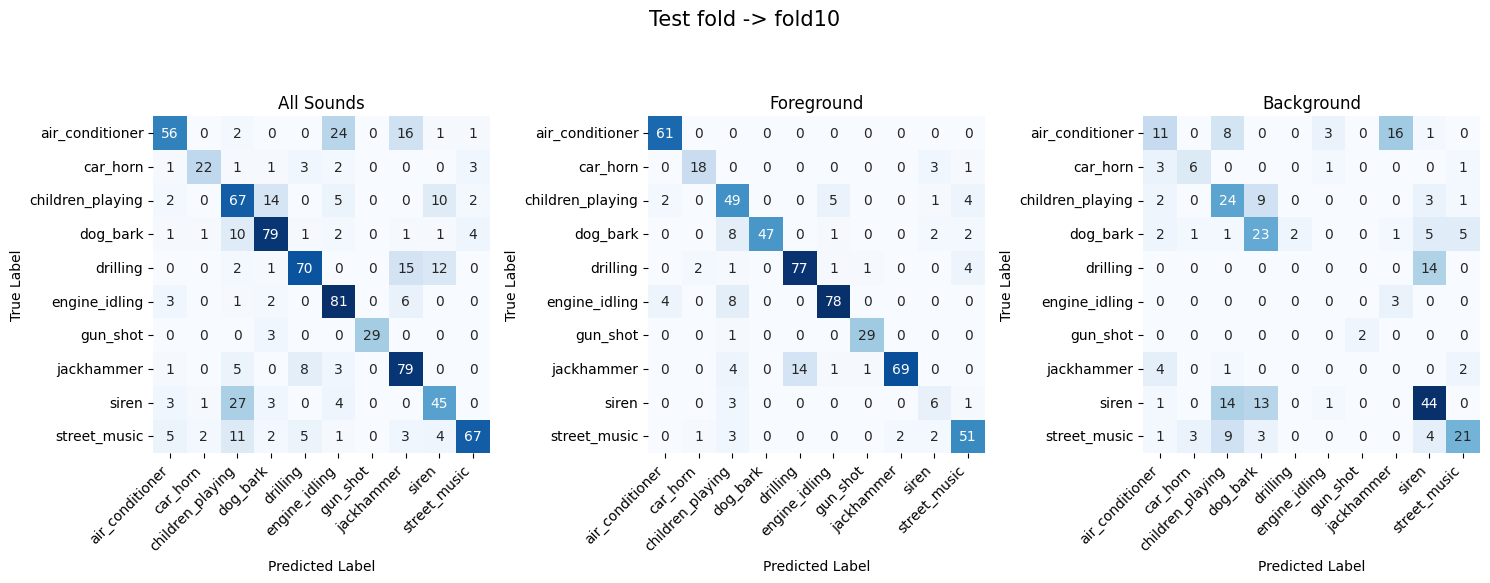

In [13]:
"""
Imprimir as matrizes de confusão para cada treino e guardar uma lista com as matrizes de confusão todas
para cada salience para depois ser calculada a matriz confusão global

É preciso verificar se a matriz vem no tamanho (9, 9) em vez do esperado (10, 10), isto acontece porque por vezes
o modelo não classifica nenhum caso como street music o que faz com que esta classe não apareça na matriz. Quando é este
o caso, é criada uma linha e uma coluna para esta classe preenchida com zeros
"""

class_names = ['air_conditioner','car_horn','children_playing','dog_bark','drilling','engine_idling','gun_shot','jackhammer','siren','street_music']
cm_salience_0_list_cnn = []
cm_salience_1_list_cnn = []
cm_salience_2_list_cnn = []


for fold in folds:

    _, _, X_test0, y_test0 = get_train_and_test_data(fold, 0)

    model0_path = f"/content/drive/MyDrive/trabalho_AC2/models/cnn/{fold}/salience0"
    model0 = load_model(model0_path)
    test_preds_0 = model0.predict(X_test0)
    test_pred_classes_0 = np.argmax(test_preds_0, axis=1)



    _, _, X_test1, y_test1 = get_train_and_test_data(fold, 1)

    model1_path = f"/content/drive/MyDrive/trabalho_AC2/models/cnn/{fold}/salience1"
    model1 = load_model(model1_path)
    test_preds_1 = model1.predict(X_test1)
    test_pred_classes_1 = np.argmax(test_preds_1, axis=1)



    _, _, X_test2, y_test2 = get_train_and_test_data(fold, 2)

    model2_path = f"/content/drive/MyDrive/trabalho_AC2/models/cnn/{fold}/salience2"
    model2 = load_model(model2_path)
    test_preds_2 = model2.predict(X_test2)
    test_pred_classes_2 = np.argmax(test_preds_2, axis=1)


    fig, (ax) = plt.subplots(1, 3, figsize=(15, 6))

    cm0 = confusion_matrix(y_test0, test_pred_classes_0)
    if cm0.shape == (9, 9):
        new_cm0 = np.zeros((10, 10))
        new_cm0[:9, :9] = cm0
        cm0 = new_cm0.astype(int)
    plot_confusion_matrix(cm0, class_names, ax[0], title = "All Sounds")
    cm_salience_0_list_cnn.append(cm0)


    cm1 = confusion_matrix(y_test1, test_pred_classes_1)
    if cm1.shape == (9, 9):
        new_cm1 = np.zeros((10, 10))
        new_cm1[:9, :9] = cm1
        cm1 = new_cm1.astype(int)
    plot_confusion_matrix(cm1, class_names, ax[1], title = "Foreground")
    cm_salience_1_list_cnn.append(cm1)

    cm2 = confusion_matrix(y_test2, test_pred_classes_2)
    if cm2.shape == (9, 9):
        new_cm2 = np.zeros((10, 10))
        new_cm2[:9, :9] = cm2
        cm2 = new_cm2.astype(int)
    plot_confusion_matrix(cm2, class_names, ax[2], title = "Background")
    cm_salience_2_list_cnn.append(cm2)

    fig.suptitle(f"Test fold -> {fold}", fontsize = 15)
    fig.tight_layout()
    plt.show()



For training with all sounds, the mean accuracy was 65.97+-5.24
For training with sounds in the foreground, the mean accuracy was 75.82+-7.09
For training with sounds in the background, the mean accuracy was 51.83+-5.89



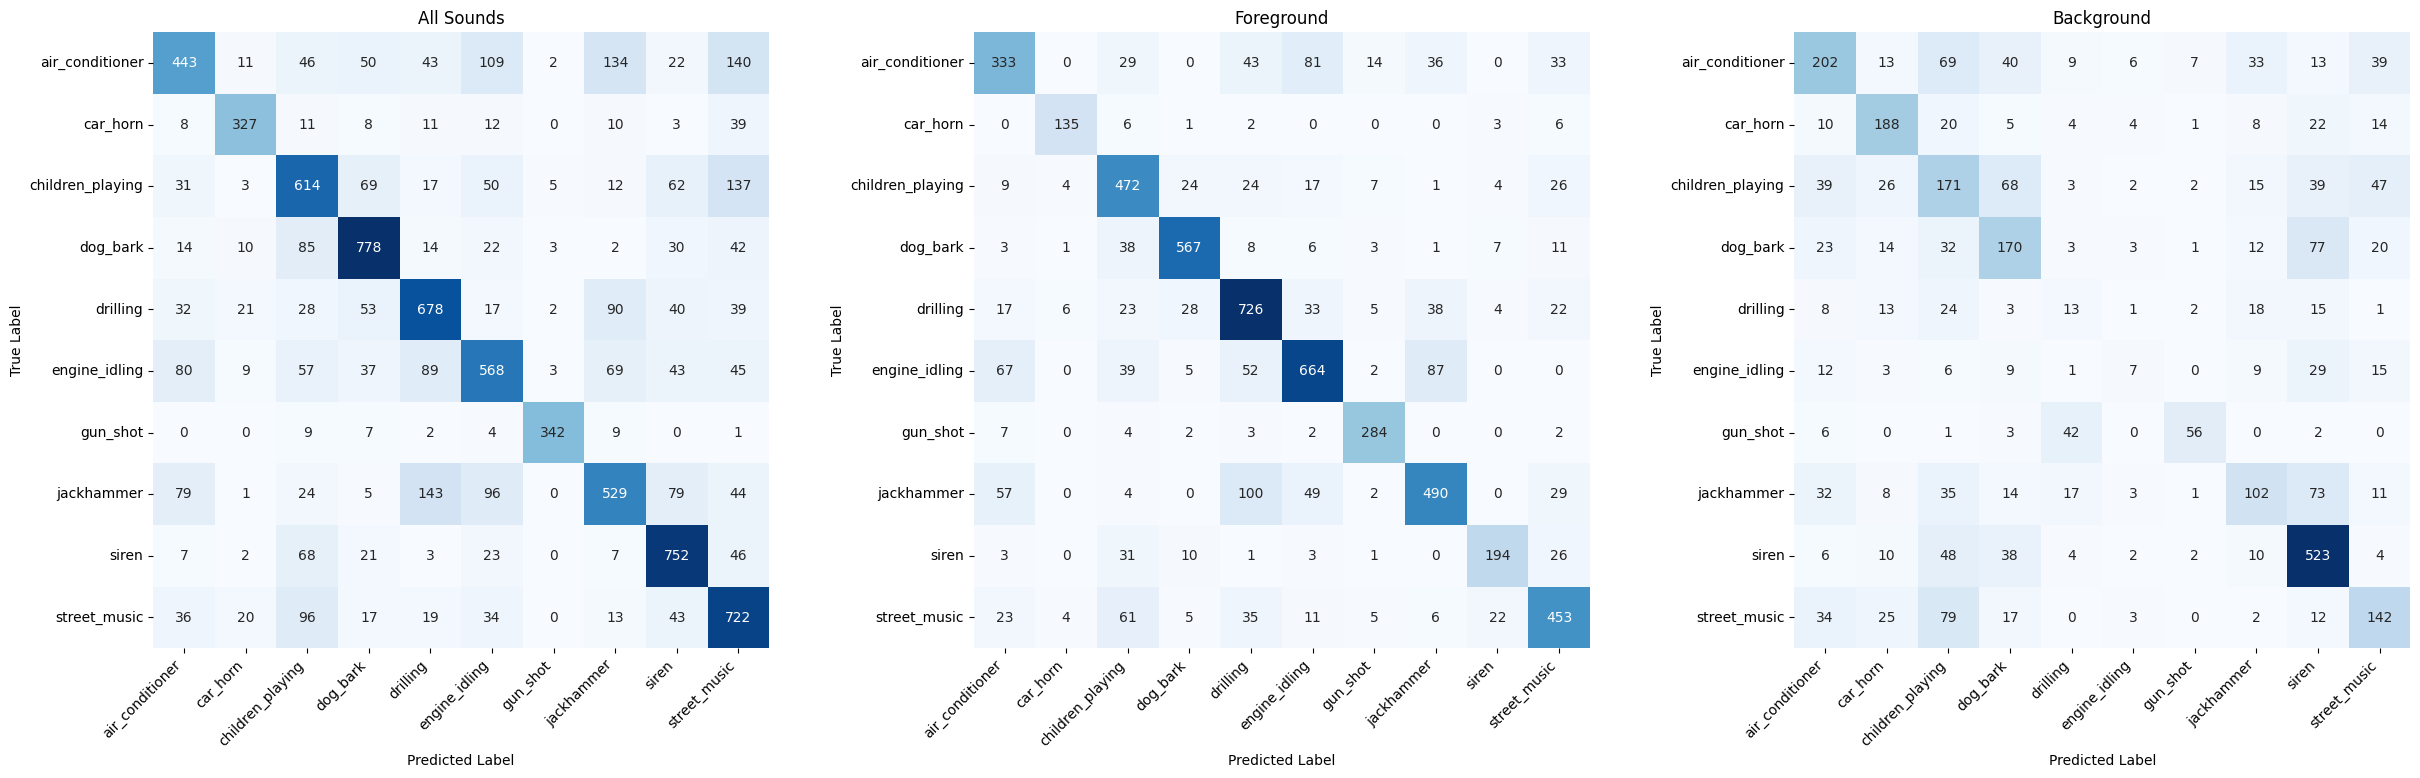

In [14]:
"""
Imprimir a accuracy com o devido desvio padrão e a matriz confusão do treino para cada salience

Os titulos das matrizes de confusão deveriam ser: All Sounds, Foreground e Backgroud.
"""

for salience in [0, 1, 2]:
    values = CNN_df.iloc[:, salience].tolist()
    mean = np.mean(values)
    std = np.std(values)
    if salience == 0:
        print(f"For training with all sounds, the mean accuracy was {mean:.2f}+-{std:.2f}")
    elif salience == 1:
        print(f"For training with sounds in the foreground, the mean accuracy was {mean:.2f}+-{std:.2f}")
    elif salience == 2:
        print(f"For training with sounds in the background, the mean accuracy was {mean:.2f}+-{std:.2f}")
print()



final_cm0 = cm_salience_0_list_cnn[0].copy()

for cm in cm_salience_0_list_cnn[1:]:
    final_cm0 += cm.copy()


final_cm1 = cm_salience_1_list_cnn[0].copy()

for cm in cm_salience_1_list_cnn[1:]:
    final_cm1 += cm.copy()

final_cm2 = cm_salience_2_list_cnn[0].copy()

for cm in cm_salience_2_list_cnn[1:]:
    final_cm2 += cm.copy()

fig, (ax) = plt.subplots(1, 3, figsize=(30, 8))
plot_confusion_matrix(final_cm0, class_names, ax[0], title = "All Sounds")
plot_confusion_matrix(final_cm1, class_names, ax[1], title = "Foreground")
plot_confusion_matrix(final_cm2.astype(int), class_names, ax[2], title = "Background")





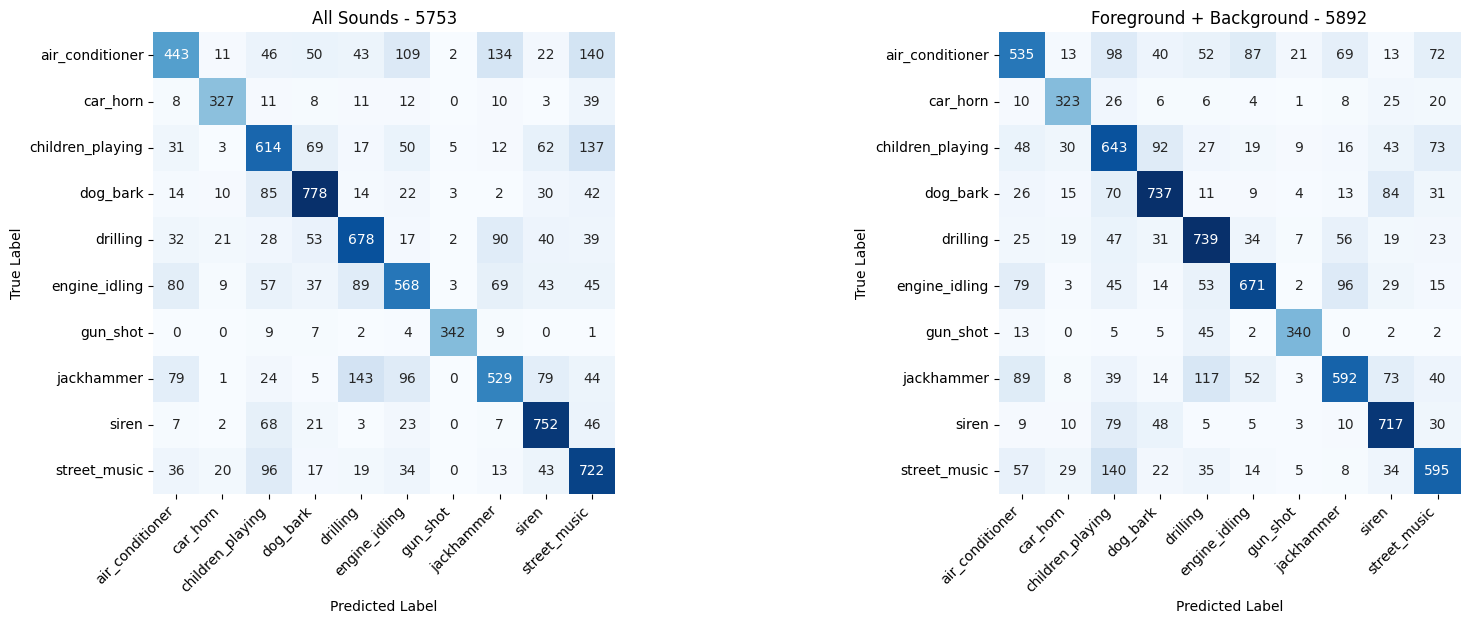

In [19]:
#Juntar as matrizes do foreground e do background e comparar com a matriz do treino com todos os sons

cm_fore_and_back = final_cm1+final_cm2
times_got_right0 = 0
times_got_right1 = 0


for i in range(10):
    times_got_right0 += final_cm0[i][i]
    times_got_right1 += cm_fore_and_back[i][i]


fig, (ax) = plt.subplots(1, 2, figsize=(20, 6))
plot_confusion_matrix(final_cm0, class_names, ax[0], title = f"All Sounds - {times_got_right0}")
plot_confusion_matrix(cm_fore_and_back, class_names, ax[1], title = f"Foreground + Background - {times_got_right1}")

## LSTM

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential, save_model, load_model
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization, LSTM, Bidirectional, InputLayer, Attention
from tensorflow.keras.regularizers import l2
from tensorflow.keras.models import save_model


In [ ]:
#Método para parar o treino prematuramnete caso não haja melhorias na accuracy de teste

early = tf.keras.callbacks.EarlyStopping(monitor = 'sparse_categorical_accuracy',patience = 10, min_delta = 0.001, restore_best_weights = True)

In [ ]:
#Modelo LSTM

def get_lstm_model():
    model = Sequential([
                        LSTM(128, return_sequences=False, input_shape=(40, 1)),
                        Dropout(0.3),
                        BatchNormalization(),
                        Dense(10, activation='softmax')
    ])

    model.compile(loss='sparse_categorical_crossentropy',
              optimizer= 'adam',
              metrics=['sparse_categorical_accuracy'])

    return model


In [ ]:
lstm_model = get_lstm_model()
lstm_model.summary()

Model: "sequential_57"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_48 (LSTM)              (None, 128)               66560     
                                                                 
 dropout_110 (Dropout)       (None, 128)               0         
                                                                 
 batch_normalization_79 (Ba  (None, 128)               512       
 tchNormalization)                                               
                                                                 
 dense_88 (Dense)            (None, 10)                1290      
                                                                 
Total params: 68362 (267.04 KB)
Trainable params: 68106 (266.04 KB)
Non-trainable params: 256 (1.00 KB)
_________________________________________________________________


In [ ]:
#Exemplo do shape dos dados que o modelo recebe

X_train, y_train, X_test, y_test = get_train_and_test_data('fold1', 0)

X_train = np.mean(X_train, axis=2)
X_test = np.mean(X_test, axis=2)

X_train = np.expand_dims(X_train, axis=-1)
X_test = np.expand_dims(X_test, axis=-1)
print(X_train.shape, X_test.shape)

(7859, 40, 1) (873, 40, 1)


In [ ]:
#Treinar o modelo com várias learning rates para perceber o impacto que a mudança deste hiperparametro teria no treino

lr_schedule = tf.keras.callbacks.LearningRateScheduler(
    lambda epoch: 1e-5 * 10**(epoch / 20))

optimizer = tf.keras.optimizers.SGD(momentum=0.9)

lstm_model.compile(loss=tf.keras.losses.Huber(), optimizer=optimizer)

history = lstm_model.fit(X_train, y_train, epochs=100, callbacks=[lr_schedule], verbose=0)

(1e-05, 1.0, 0.0, 50.0)

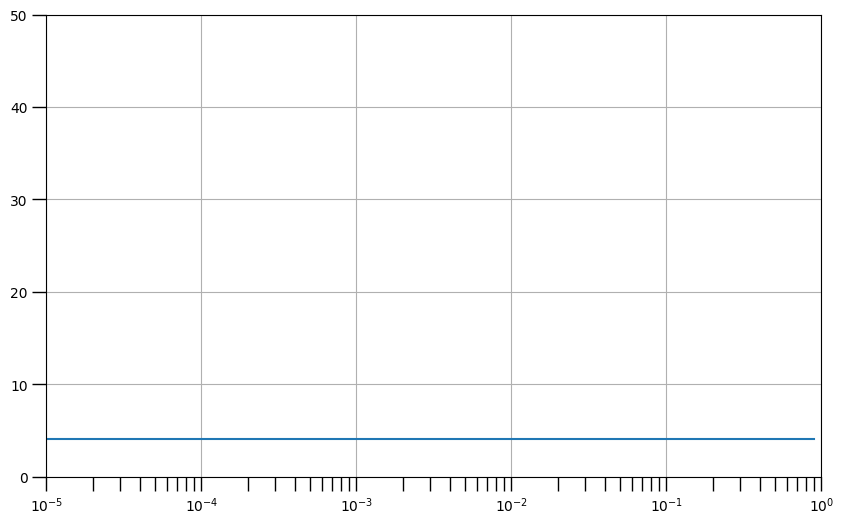

In [ ]:
#Imprimiar um gráfico com a diferença na loss à medida que a learning rate altera

lrs = 1e-5 * (10 ** (np.arange(100) / 20))
plt.figure(figsize=(10, 6))
plt.grid(True)
plt.semilogx(lrs, history.history["loss"])
plt.tick_params('both', length=10, width=1, which='both')
plt.axis([1e-5, 1e0, 0, 50])

In [ ]:
"""
Treinar o modelo com cross validation para cada salience
Guarda a história e a accuracy de cada treino numa lista para serem analisadas postriornente
Guarda também os modelos treinados
"""

epochs = 50
fold_lstm_history  = []
fold_lstm_accuracy = []

for fold in folds:
    print()
    print(f"Test fold -> {fold}")
    for salience in [0, 1, 2]:
        print(f"Salience -> {salience}")
        model_path = f"/content/drive/MyDrive/trabalho_AC2/models/lstm/{fold}/salience{salience}"
        X_train, y_train, X_test, y_test = get_train_and_test_data(fold, salience)
        X_train = np.mean(X_train, axis=2)
        X_test = np.mean(X_test, axis=2)
        X_train = np.expand_dims(X_train, axis=-1)
        X_test = np.expand_dims(X_test, axis=-1)
        lstm_model = get_lstm_model()
        history = lstm_model.fit(X_train, y_train, batch_size=64, epochs=epochs, validation_data=(X_test, y_test), callbacks=[early], verbose=0)
        accuracy_score = lstm_model.evaluate(X_test, y_test)
        fold_lstm_history.append(history)
        fold_lstm_accuracy.append(accuracy_score)
        save_model(lstm_model, model_path)





Test fold -> fold1
Salience -> 0
28/28 [==============================] - 0s 6ms/step - loss: 3.7274 - sparse_categorical_accuracy: 0.4880
Salience -> 1
20/20 [==============================] - 0s 4ms/step - loss: 3.0763 - sparse_categorical_accuracy: 0.5659
Salience -> 2
8/8 [==============================] - 0s 6ms/step - loss: 5.3751 - sparse_categorical_accuracy: 0.3546

Test fold -> fold2
Salience -> 0
28/28 [==============================] - 0s 4ms/step - loss: 3.7433 - sparse_categorical_accuracy: 0.4133
Salience -> 1
18/18 [==============================] - 0s 8ms/step - loss: 3.1871 - sparse_categorical_accuracy: 0.4659
Salience -> 2
11/11 [==============================] - 0s 4ms/step - loss: 4.3474 - sparse_categorical_accuracy: 0.3303

Test fold -> fold3
Salience -> 0
29/29 [==============================] - 0s 5ms/step - loss: 4.1791 - sparse_categorical_accuracy: 0.4162
Salience -> 1
19/19 [==============================] - 0s 4ms/step - loss: 4.3978 - sparse_categorical

In [ ]:
"""
Dataframe com os resultados de todas as iterações
Cada linha é uma iteração e as folds foram usadas para teste por ordem, ou seja, a primeira linha corresponde
ao teste feito com a fold 1 servindo como teste e assim por diante
"""

LSTM_df = pd.DataFrame(np.array(fold_lstm_accuracy)[:,1].reshape(10,3)*100,  columns=['LSTM', 'LSTM_FG', 'LSTM_BG'])
LSTM_df

,LSTM,LSTM_FG,LSTM_BG
0,48.797250,56.591642,35.458168
1,41.328830,46.594983,33.030304
2,41.621622,42.881355,43.582091
3,40.808082,40.143371,41.203704
4,51.923078,54.147816,45.054945
5,39.854193,53.398061,31.493506
6,53.937948,54.182512,41.987181
7,45.657569,50.905800,34.251967
8,54.534316,67.090911,32.330826
9,42.771804,54.929578,29.739776


In [ ]:
#Guardar o dataframe para um ficheiro csv

LSTM_df.to_csv('/content/drive/MyDrive/trabalho_AC2/LSTM_results.csv', index=False)

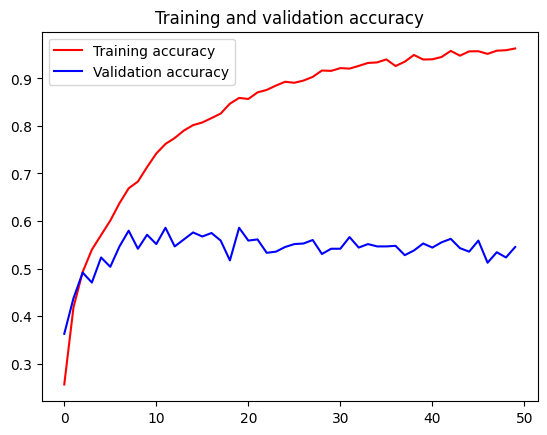

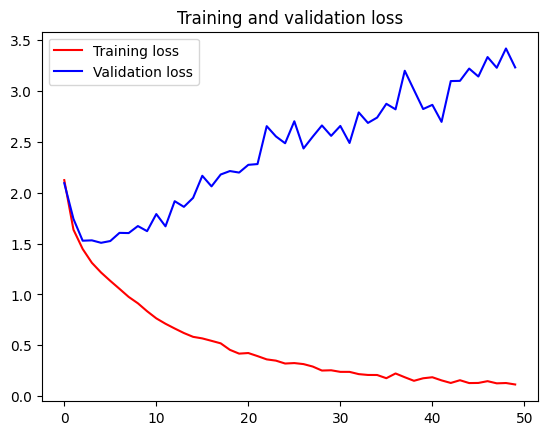

<Figure size 640x480 with 0 Axes>

In [ ]:
#Gráficos do melhor treino com a salience 0

best_history_lstm = fold_lstm_history[24]
plot_history(best_history_lstm)

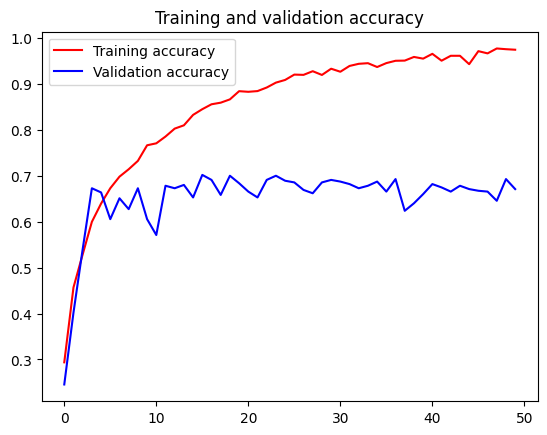

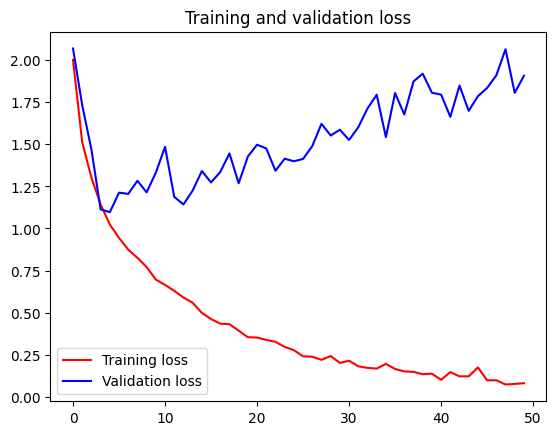

<Figure size 640x480 with 0 Axes>

In [ ]:
#Gráficos do melhor treino com a salience 1

best_history_lstm = fold_lstm_history[25]
plot_history(best_history_lstm)

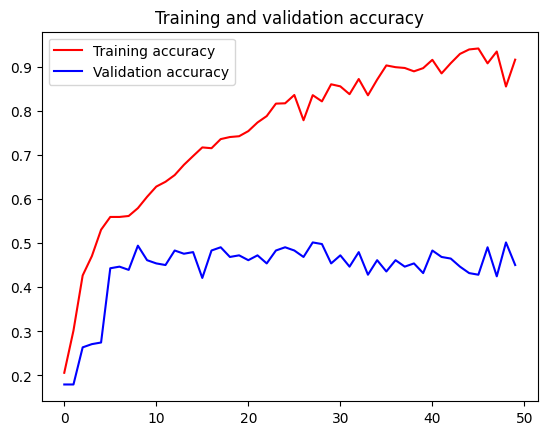

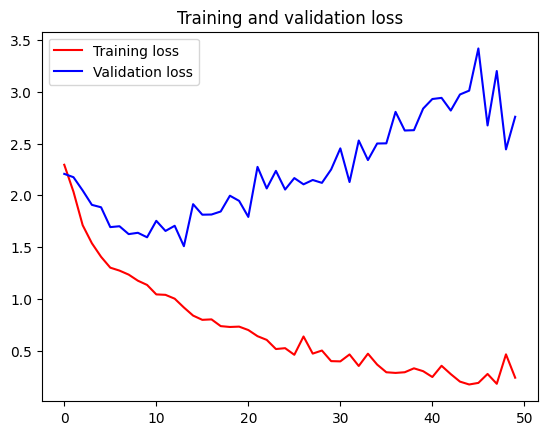

<Figure size 640x480 with 0 Axes>

In [ ]:
#Gráficos do melhor treino com a salience 2


best_history_lstm = fold_lstm_history[14]
plot_history(best_history_lstm)

In [22]:
LSTM_df = pd.read_csv('/content/drive/MyDrive/trabalho_AC2/LSTM_results.csv')

8/8 [==============================] - 1s 18ms/step


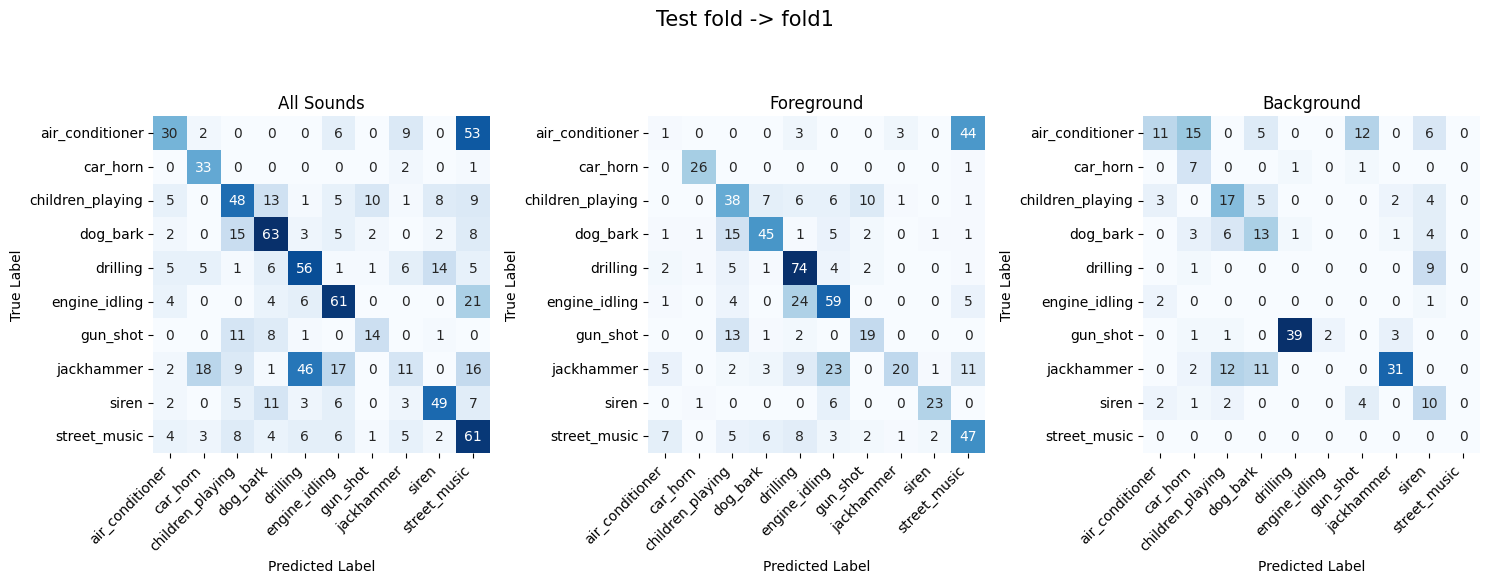

11/11 [==============================] - 1s 17ms/step


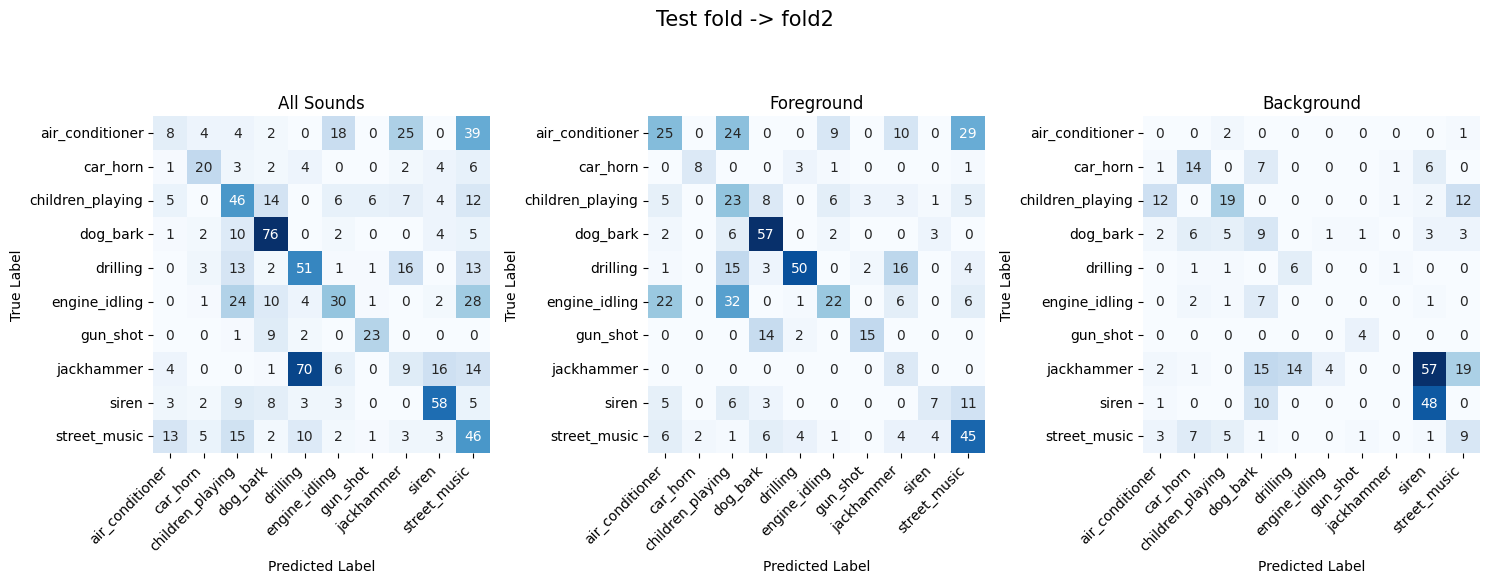

11/11 [==============================] - 1s 36ms/step


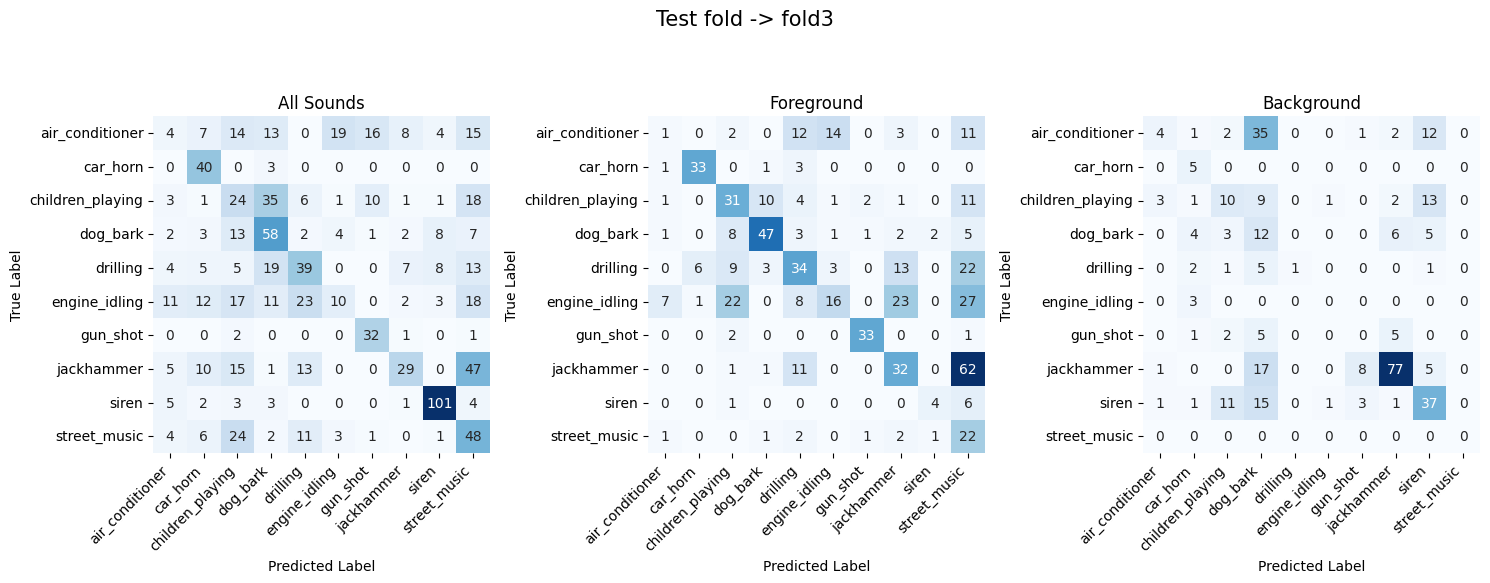

14/14 [==============================] - 1s 20ms/step


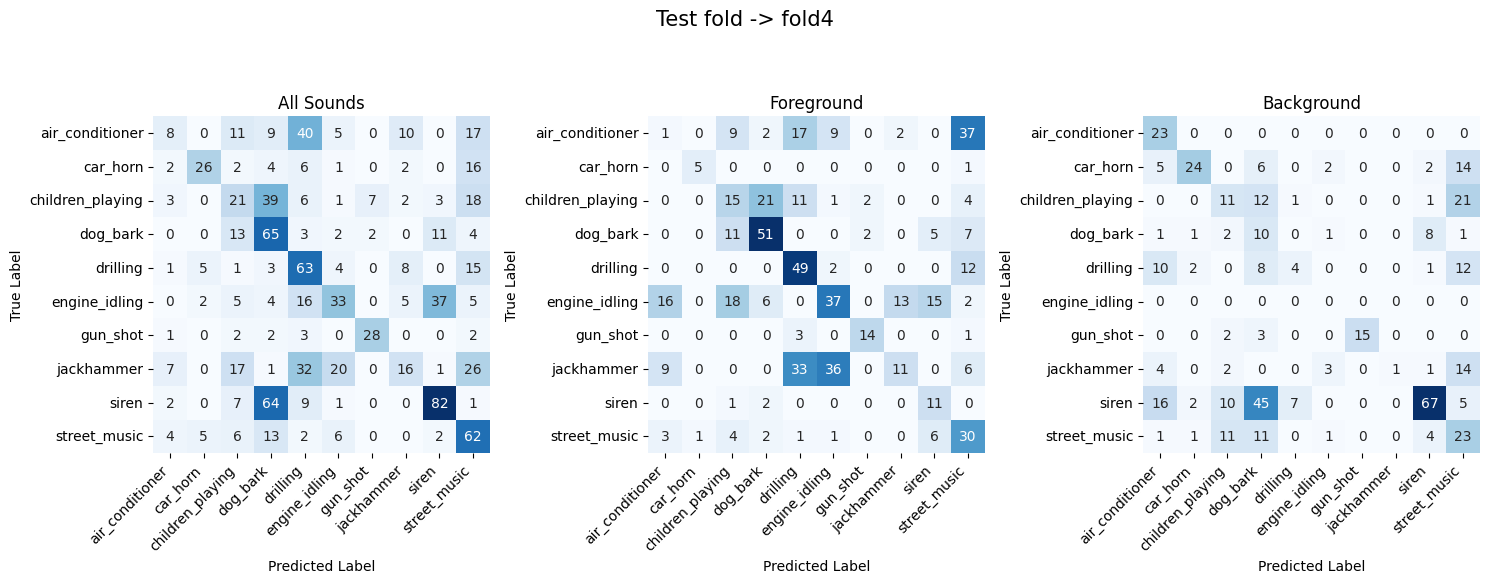

9/9 [==============================] - 1s 19ms/step


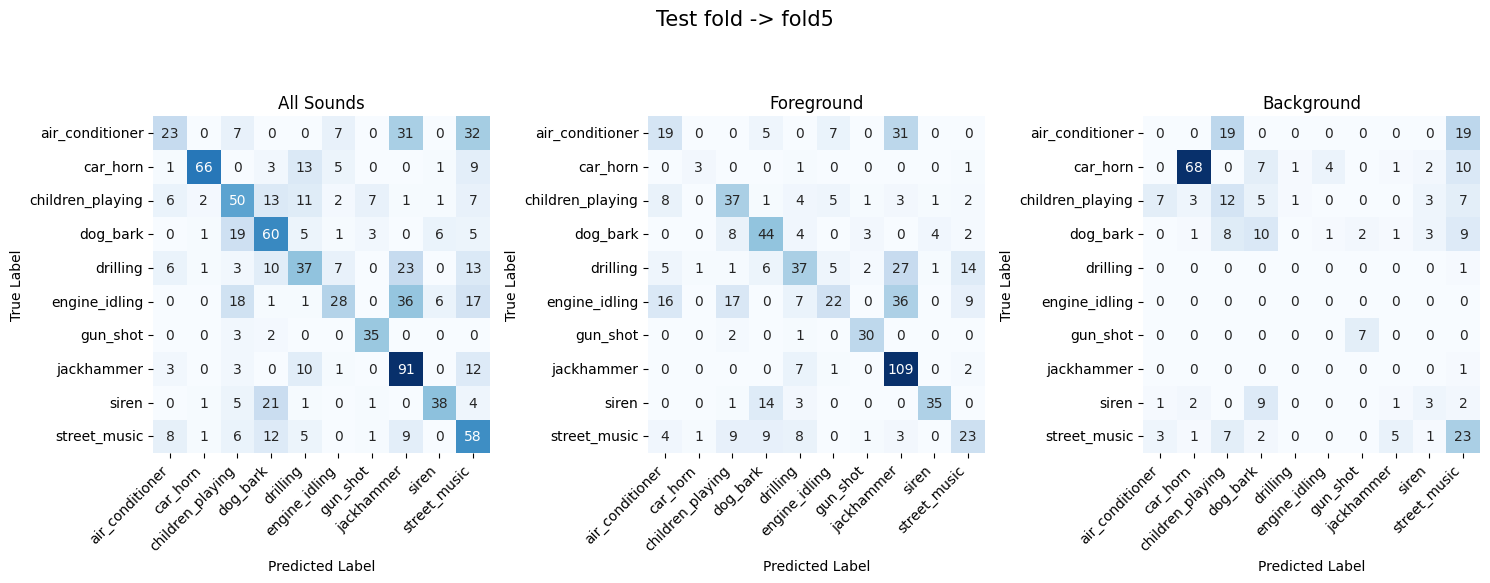

10/10 [==============================] - 1s 36ms/step


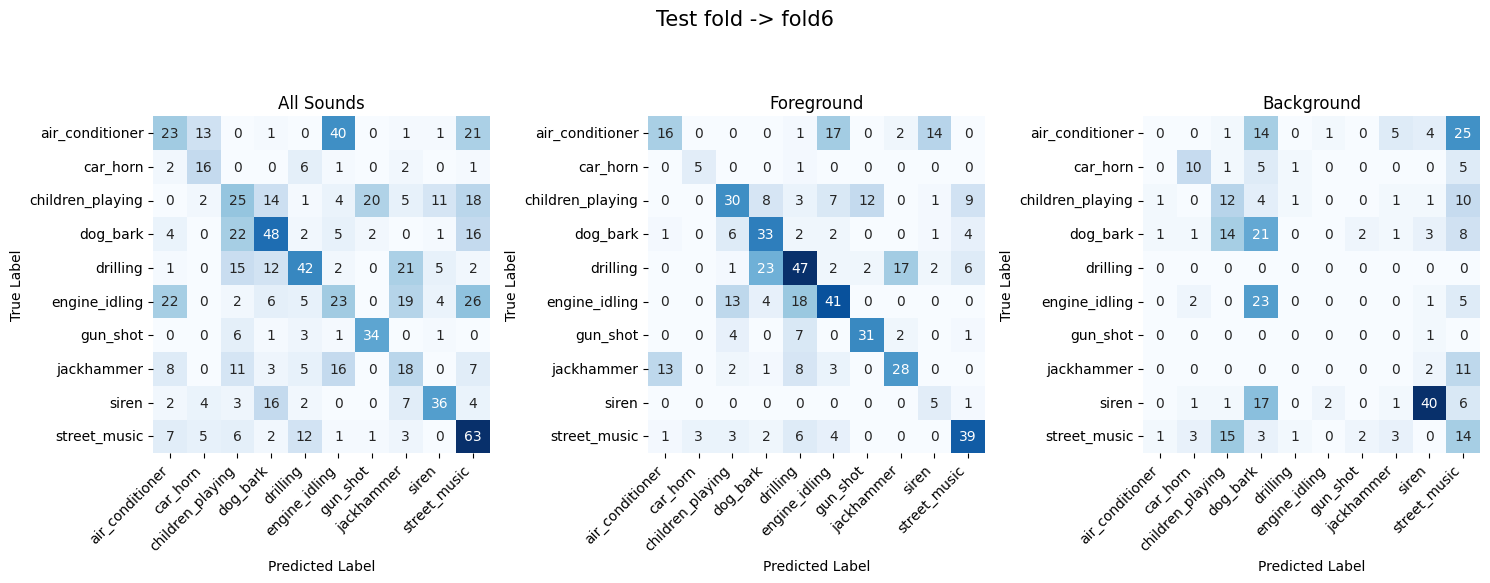

10/10 [==============================] - 1s 34ms/step


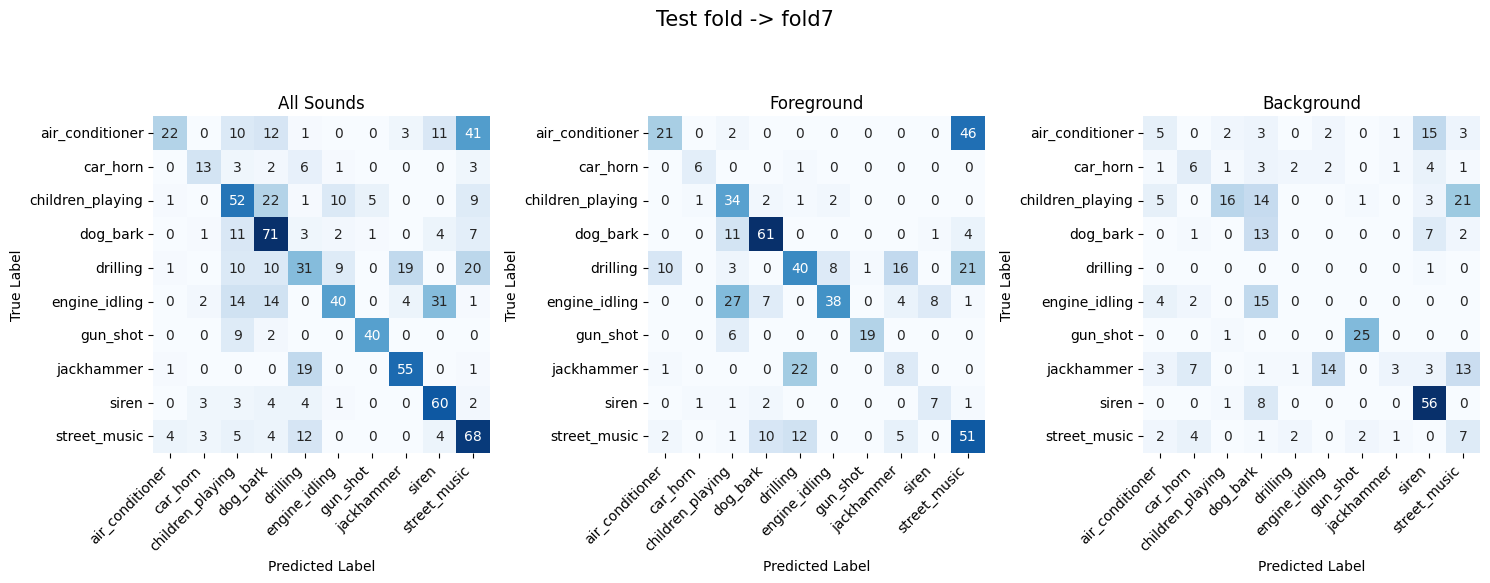

8/8 [==============================] - 1s 21ms/step


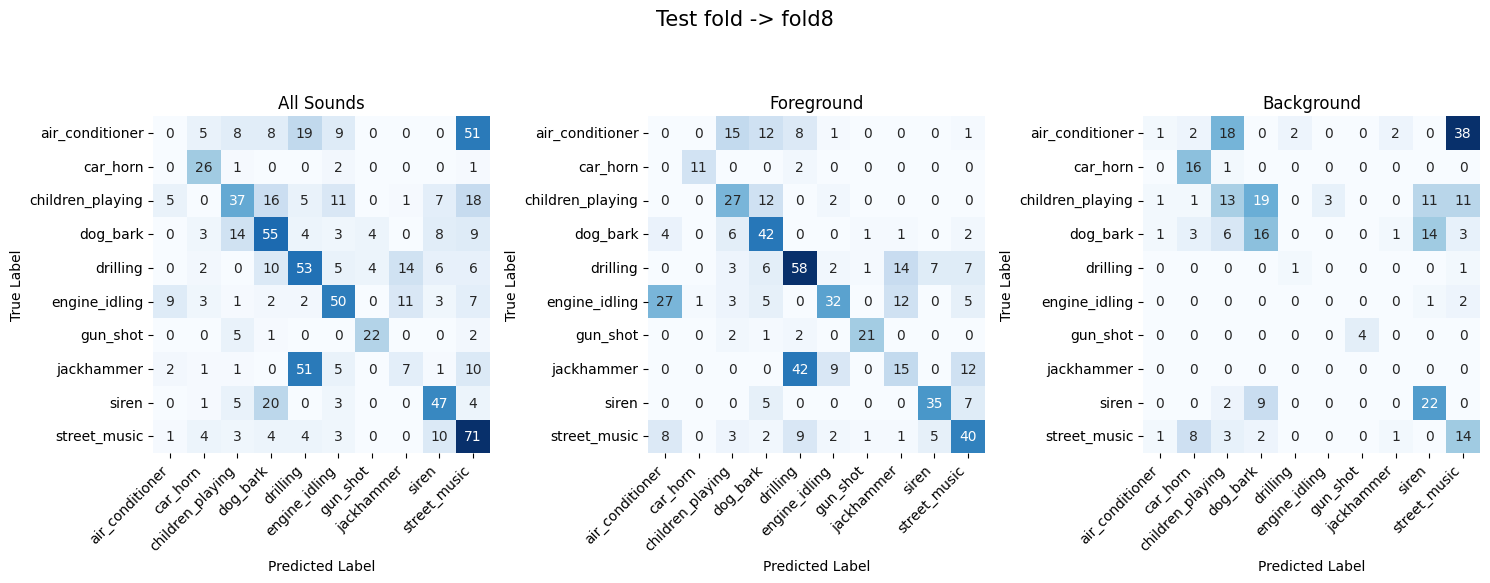

9/9 [==============================] - 1s 21ms/step


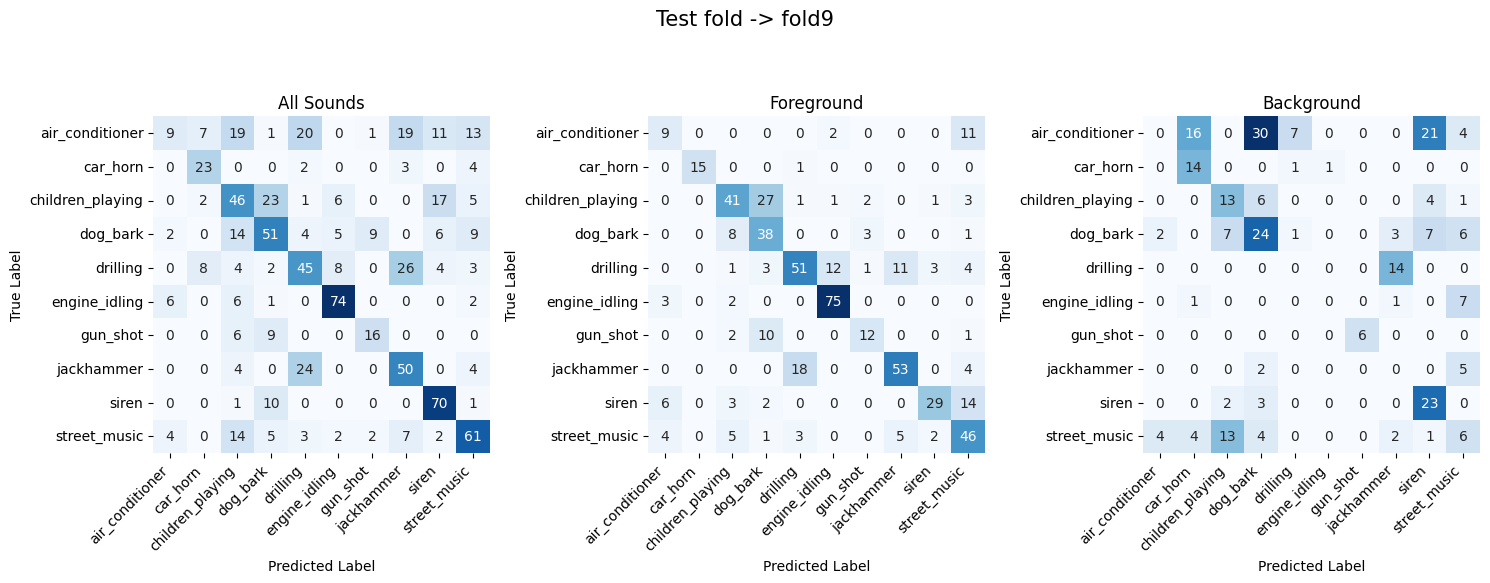

9/9 [==============================] - 1s 38ms/step


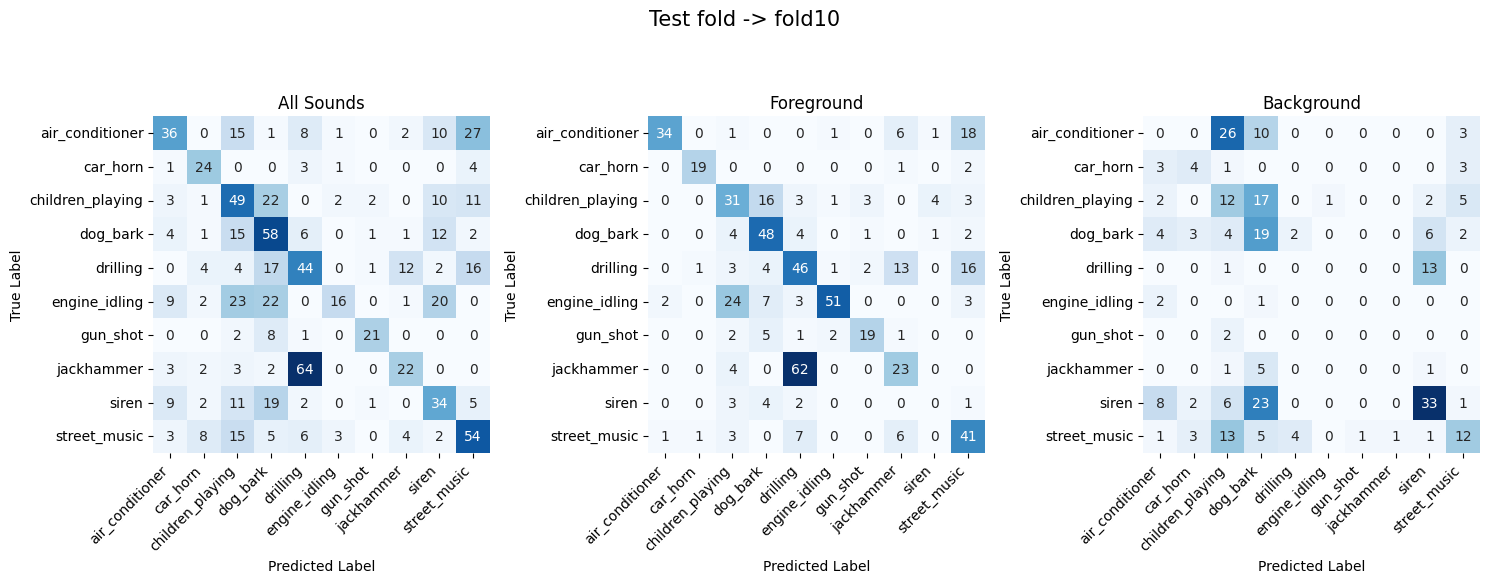

In [20]:
"""
Imprimir as matrizes de confusão para cada treino e guardar uma lista com as matrizes de confusão todas
para cada salience para depois ser calculada a matriz confusão global

É preciso verificar se a matriz vem no tamanho (9, 9) em vez do esperado (10, 10), isto acontece porque por vezes
o modelo não classifica nenhum caso como street music o que faz com que esta classe não apareça na matriz. Quando é este
o caso, é criada uma linha e uma coluna para esta classe preenchida com zeros
"""

class_names = ['air_conditioner','car_horn','children_playing','dog_bark','drilling','engine_idling','gun_shot','jackhammer','siren','street_music']
cm_salience_0_list_lstm = []
cm_salience_1_list_lstm = []
cm_salience_2_list_lstm = []


for fold in folds:

    _, _, X_test0, y_test0 = get_train_and_test_data(fold, 0)

    X_test0 = np.mean(X_test0, axis=2)
    X_test0 = np.expand_dims(X_test0, axis=-1)

    model0_path = f"/content/drive/MyDrive/trabalho_AC2/models/lstm/{fold}/salience0"
    model0 = load_model(model0_path)
    test_preds_0 = model0.predict(X_test0)
    test_pred_classes_0 = np.argmax(test_preds_0, axis=1)



    _, _, X_test1, y_test1 = get_train_and_test_data(fold, 1)

    X_test1 = np.mean(X_test1, axis=2)
    X_test1 = np.expand_dims(X_test1, axis=-1)

    model1_path = f"/content/drive/MyDrive/trabalho_AC2/models/lstm/{fold}/salience1"
    model1 = load_model(model1_path)
    test_preds_1 = model1.predict(X_test1)
    test_pred_classes_1 = np.argmax(test_preds_1, axis=1)



    _, _, X_test2, y_test2 = get_train_and_test_data(fold, 2)

    X_test2 = np.mean(X_test2, axis=2)
    X_test2 = np.expand_dims(X_test2, axis=-1)


    model2_path = f"/content/drive/MyDrive/trabalho_AC2/models/lstm/{fold}/salience2"
    model2 = load_model(model2_path)
    test_preds_2 = model2.predict(X_test2)
    test_pred_classes_2 = np.argmax(test_preds_2, axis=1)


    fig, (ax) = plt.subplots(1, 3, figsize=(15, 6))

    cm0 = confusion_matrix(y_test0, test_pred_classes_0)
    if cm0.shape == (9, 9):
        new_cm0 = np.zeros((10, 10))
        new_cm0[:9, :9] = cm0
        cm0 = new_cm0.astype(int)
    plot_confusion_matrix(cm0, class_names, ax[0], title = "All Sounds")
    cm_salience_0_list_lstm.append(cm0)

    cm1 = confusion_matrix(y_test1, test_pred_classes_1)
    if cm1.shape == (9, 9):
        new_cm1 = np.zeros((10, 10))
        new_cm1[:9, :9] = cm1
        cm1 = new_cm1.astype(int)
    plot_confusion_matrix(cm1, class_names, ax[1], title = "Foreground")
    cm_salience_1_list_lstm.append(cm1)


    cm2 = confusion_matrix(y_test2, test_pred_classes_2)
    if cm2.shape == (9, 9):
        new_cm2 = np.zeros((10, 10))
        new_cm2[:9, :9] = cm2
        cm2 = new_cm2.astype(int)
    plot_confusion_matrix(cm2, class_names, ax[2], title = "Background")
    cm_salience_2_list_lstm.append(cm2)

    fig.suptitle(f"Test fold -> {fold}", fontsize = 15)
    fig.tight_layout()
    plt.show()








For training with all sounds, the mean accuracy was 46.12+-5.43
For training with sounds in the foreground, the mean accuracy was 52.09+-7.23
For training with sounds in the background, the mean accuracy was 36.81+-5.30



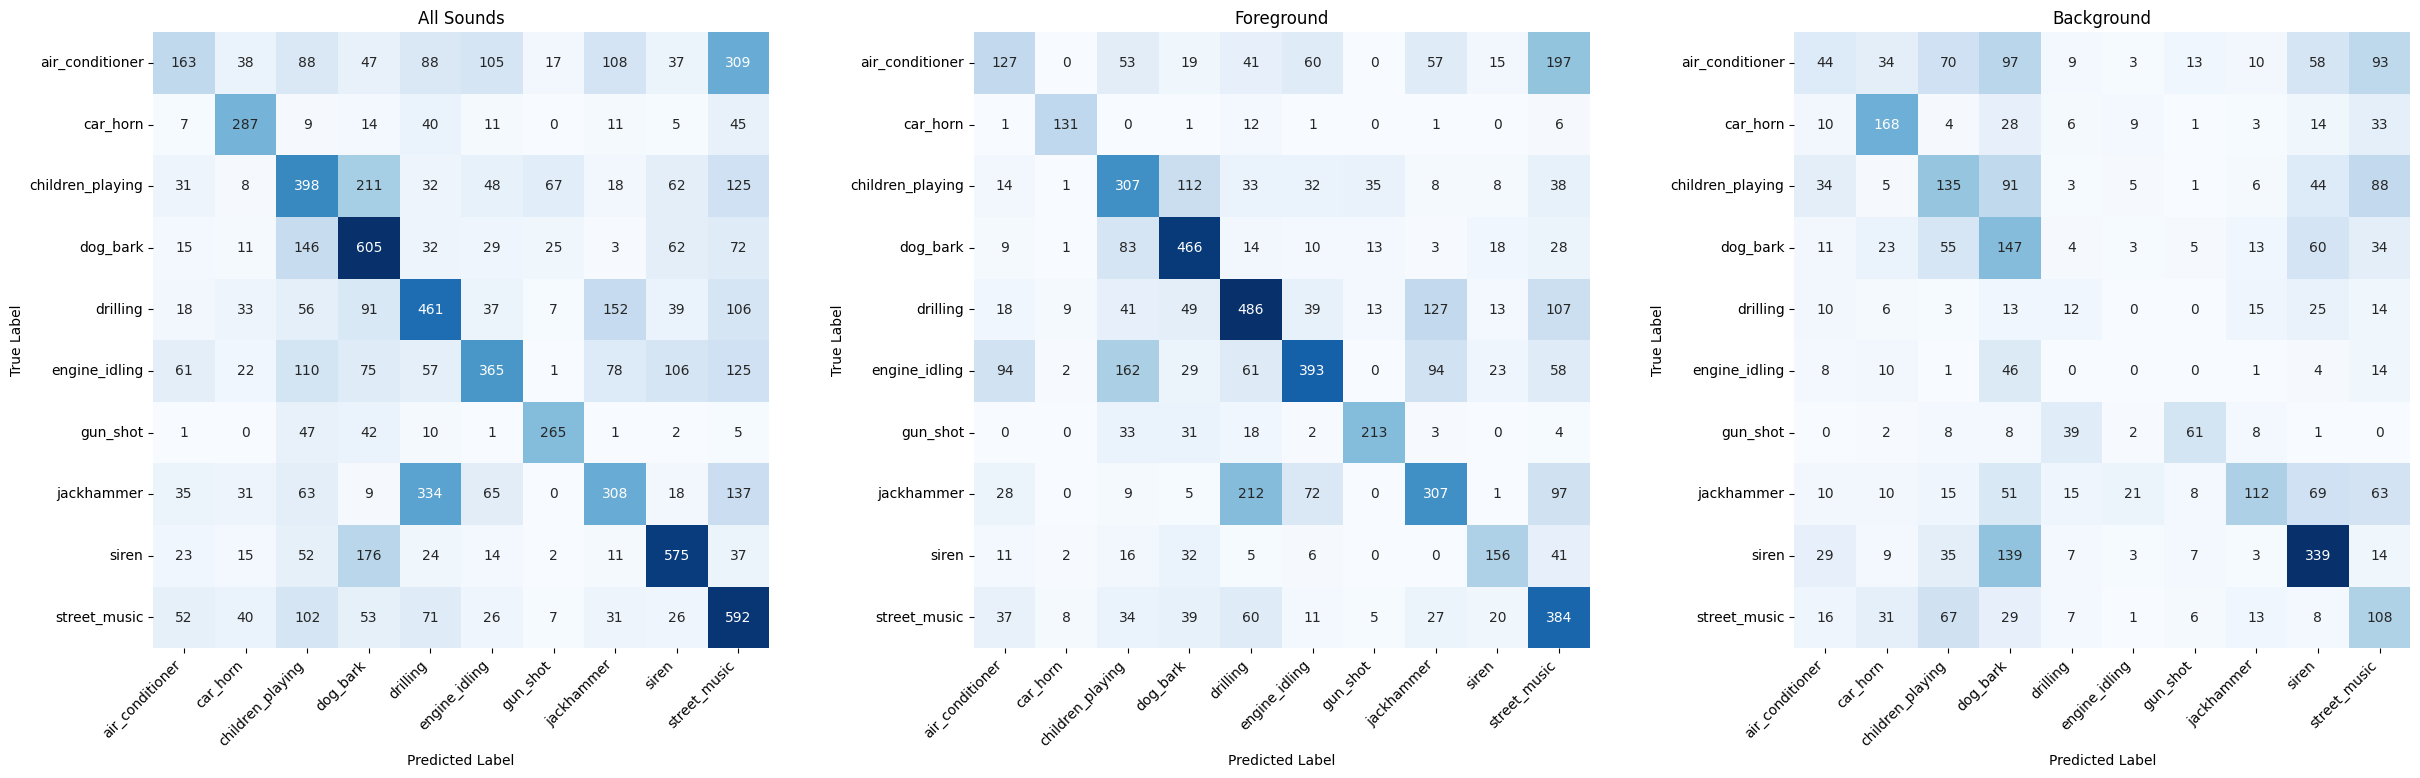

In [23]:
"""
Imprimir a accuracy com o devido desvio padrão e a matriz confusão do treino para cada salience
"""
for salience in [0, 1, 2]:
    values = LSTM_df.iloc[:, salience].tolist()
    mean = np.mean(values)
    std = np.std(values)
    if salience == 0:
        print(f"For training with all sounds, the mean accuracy was {mean:.2f}+-{std:.2f}")
    elif salience == 1:
        print(f"For training with sounds in the foreground, the mean accuracy was {mean:.2f}+-{std:.2f}")
    elif salience == 2:
        print(f"For training with sounds in the background, the mean accuracy was {mean:.2f}+-{std:.2f}")
        
print()


final_cm0 = cm_salience_0_list_lstm[0].copy()

for cm in cm_salience_0_list_lstm[1:]:
    final_cm0 += cm.copy()


final_cm1 = cm_salience_1_list_lstm[0].copy()

for cm in cm_salience_1_list_lstm[1:]:
    final_cm1 += cm.copy()

final_cm2 = cm_salience_2_list_lstm[0].copy()

for cm in cm_salience_2_list_lstm[1:]:
    final_cm2 += cm.copy()

fig, (ax) = plt.subplots(1, 3, figsize=(30, 8))
plot_confusion_matrix(final_cm0, class_names, ax[0], title = "All Sounds")
plot_confusion_matrix(final_cm1, class_names, ax[1], title = "Foreground")
plot_confusion_matrix(final_cm2.astype(int), class_names, ax[2], title = "Background")







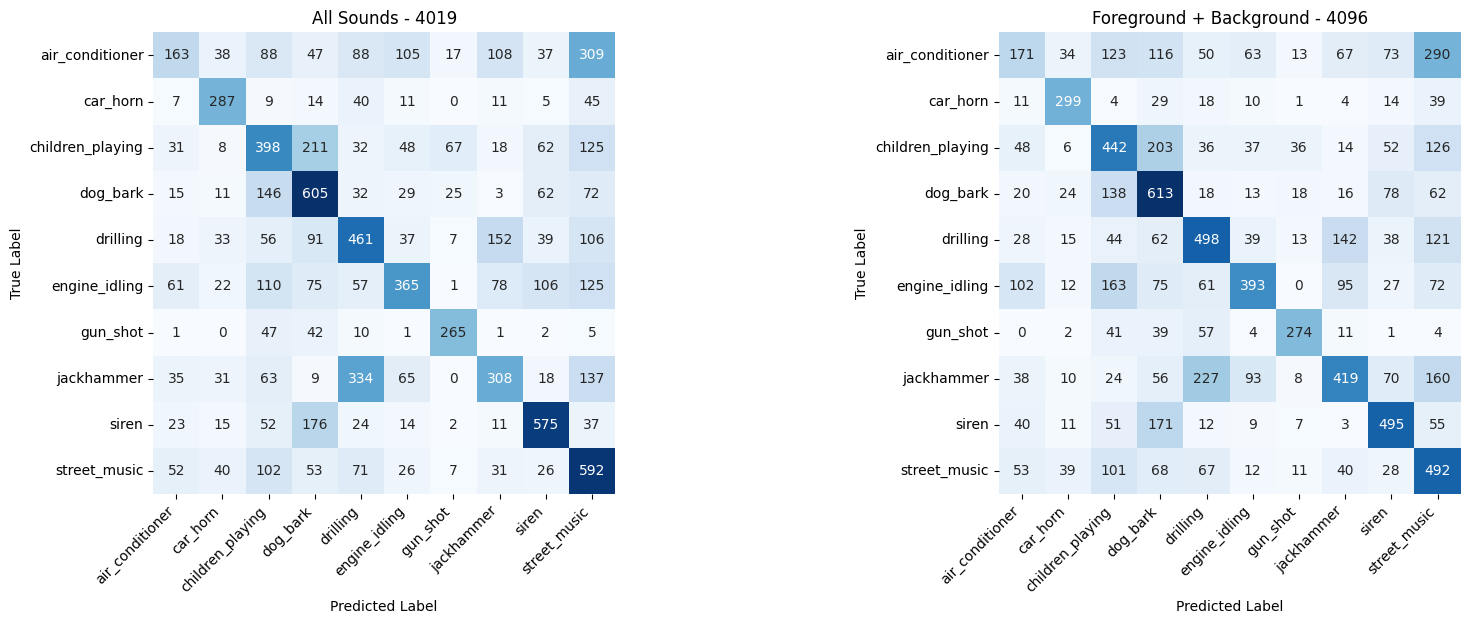

In [24]:
#Juntar as matrizes do foreground e do background e comparar com a matriz do treino com todos os sons

cm_fore_and_back = final_cm1+final_cm2
times_got_right0 = 0
times_got_right1 = 0


for i in range(10):
    times_got_right0 += final_cm0[i][i]
    times_got_right1 += cm_fore_and_back[i][i]


fig, (ax) = plt.subplots(1, 2, figsize=(20, 6))
plot_confusion_matrix(final_cm0, class_names, ax[0], title = f"All Sounds - {times_got_right0}")
plot_confusion_matrix(cm_fore_and_back, class_names, ax[1], title = f"Foreground + Background - {times_got_right1}")